<a href="https://colab.research.google.com/github/AngelLuna476/Challenge_Data_Science_-2-_TelecomX_LATAM/blob/main/challenge_2_TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom X - Análisis de Evasión de Clientes

## Marco teórico del proyecto

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué se practica en este desafío?
1. ✅ Importación y manipulación datos desde una API de manera eficiente.
2. ✅ Aplicación de los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
3. ✅ Creación de visualizaciones estratégicas para identificar patrones y tendencias.
4. ✅ Realización de un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

<br></br>
_Al final del trabajo realizado se detallará un informe_

In [56]:
# Importación de bibliotecas a usar

import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Counter

##📌 Extracción

Para iniciar el análisis, se necesitará importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

¿Qué se debe de hacer para que se cumpla esta parte?
1. ✅ Cargar los datos directamente desde la API utilizando Python.
2. ✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.



### Proceso de Extracción de datos

In [57]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

datos_telecomx = pd.read_json(url)
datos_telecomx

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


Se realiza la normallización de los datos del archivo de la siguiente forma

In [58]:
# Normalizar cada sección correctamente (directamente desde datos_telecomx)
df_customer = pd.json_normalize(datos_telecomx['customer'], sep='_')
df_phone = pd.json_normalize(datos_telecomx['phone'], sep='_')
df_internet = pd.json_normalize(datos_telecomx['internet'], sep='_')
df_account = pd.json_normalize(datos_telecomx['account'], sep='_')

# Extraer los valores de 'Charges' dentro de 'account'
df_charges = pd.json_normalize(datos_telecomx['account'].apply(lambda x: x.get('Charges', {})), sep='_')

# Agregar customerID a cada DataFrame antes de unirlos
df_customer['customerID'] = datos_telecomx['customerID']
df_phone['customerID'] = datos_telecomx['customerID']
df_internet['customerID'] = datos_telecomx['customerID']
df_account['customerID'] = datos_telecomx['customerID']
df_charges['customerID'] = datos_telecomx['customerID']

# Mantener customerID y Churn
df_customer_id_churn = datos_telecomx[['customerID', 'Churn']].copy()

# Unir todo en un DataFrame final asegurando la relación con customerID
datos_telecomx_final = df_customer_id_churn.merge(df_customer, on='customerID', how='left') \
                                           .merge(df_phone, on='customerID', how='left') \
                                           .merge(df_internet, on='customerID', how='left') \
                                           .merge(df_account, on='customerID', how='left') \
                                           .merge(df_charges, on='customerID', how='left')

print(datos_telecomx_final.head())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... TechSupport StreamingTV  \
0          Yes            No             DSL  ...         Yes         Yes   
1          Yes           Yes             DSL  ...          No          No   
2          Yes            No     Fiber optic  ...          No          No   
3          Yes            No     Fiber optic  ...          No         Yes   
4          Yes            No     Fiber optic  ...         Yes         Yes   

  StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0              No        O

Después de haber realizado lo anterior, se realiza la vizualización en formato de tabla

In [59]:
display(datos_telecomx_final)  # Muestra el DataFrame en formato de tabla

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,Yes,No,No,One year,No,Mailed check,55.15,742.9,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,67.85,4627.65


##*🔧* Transformación

### Conozce el conjunto de datos

Ahora que se han extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, se agrega a continuación un diccionario creado para la comprensión de datos con la descripción de cada columna.


¿Qué se debe de realizar para que se cumpla esta parte?
1. ✅ Explorar las columnas del dataset y verificar sus tipos de datos.
2. ✅ Consultar el diccionario para comprender mejor el significado de las variables.
3. ✅ Identificar las columnas más relevantes para el análisis de evasión.

#### Diccionario de datos proporcionado para la realización del desafío:


1. customerID: número de identificación único de cada cliente
2. Churn: si el cliente dejó o no la empresa
3. gender: género (masculino y femenino)
4. SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
5. Partner: si el cliente tiene o no una pareja
6. Dependents: si el cliente tiene o no dependientes
7. tenure: meses de contrato del cliente
8. PhoneService: suscripción al servicio telefónico
9. MultipleLines: suscripción a más de una línea telefónica
10. InternetService: suscripción a un proveedor de internet
11. OnlineSecurity: suscripción adicional de seguridad en línea
12. OnlineBackup: suscripción adicional de respaldo en línea
13. DeviceProtection: suscripción adicional de protección del dispositivo
14. TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
15. StreamingTV: suscripción de televisión por cable
16. StreamingMovies: suscripción de streaming de películas
17. Contract: tipo de contrato
18. PaperlessBilling: si el cliente prefiere recibir la factura en línea
19. PaymentMethod: forma de pago
20. Charges.Monthly: total de todos los servicios del cliente por mes
21. Charges.Total: total gastado por el cliente

#### Continuación de la programación

In [60]:
# Se realiza la exploración de las columnas que se tienen en el DataFrame y la verificación de los tipos de datos con el siguiente comando
datos_telecomx_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [61]:
# Se reemplazan los valores problemáticos y se convierten las columnas necesarias para el análisis a float64
datos_telecomx_final['Total'] = pd.to_numeric(datos_telecomx_final['Total'], errors='coerce')
datos_telecomx_final['Total'] = datos_telecomx_final['Total'].fillna(0).astype(np.float64)


datos_telecomx_final['Charges_Total'] = pd.to_numeric(datos_telecomx_final['Charges_Total'], errors='coerce')
datos_telecomx_final['Charges_Total'] = datos_telecomx_final['Charges_Total'].fillna(0).astype(np.float64)


print(datos_telecomx_final.dtypes)  # Verificar el tipo de la columna después de la conversión

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges_Monthly     float64
Charges_Total       float64
Monthly             float64
Total               float64
dtype: object


### Comprobación de incoherencias y Manejo de inconsistencias en los datos

En este paso, se verifica si hay problemas en los datos que puedan afectar el análisis. Se presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurar de que los datos estén listos para las siguientes etapas.

Después de que se han identificado las inconsistencias, se deben de aplicar las correcciones necesarias ajustando los datos para asegurar de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [62]:
# Identifica las columnas con valores NaN, 0 o vacíos
columnas_con_faltantes = datos_telecomx_final.columns[
    (datos_telecomx_final.isnull().sum() > 0) |
    ((datos_telecomx_final == 0).sum() > 0) |
    ((datos_telecomx_final == "").sum() > 0) |
    ((datos_telecomx_final == " ").sum() > 0)
]

# Crear un DataFrame con el conteo de cada tipo de valor faltante
conteo_faltantes = pd.DataFrame({
    'Valores NaN': datos_telecomx_final.isnull().sum(),
    'Valores 0': (datos_telecomx_final == 0).sum(),
    'Valores Vacíos': (datos_telecomx_final == "").sum(),
    'Valores espacio vacio': (datos_telecomx_final == " ").sum()
})


# Mostrar los resultados
print(conteo_faltantes)

                  Valores NaN  Valores 0  Valores Vacíos  \
customerID                  0          0               0   
Churn                       0          0             224   
gender                      0          0               0   
SeniorCitizen               0       6085               0   
Partner                     0          0               0   
Dependents                  0          0               0   
tenure                      0         11               0   
PhoneService                0          0               0   
MultipleLines               0          0               0   
InternetService             0          0               0   
OnlineSecurity              0          0               0   
OnlineBackup                0          0               0   
DeviceProtection            0          0               0   
TechSupport                 0          0               0   
StreamingTV                 0          0               0   
StreamingMovies             0          0

Debido a los valores encontrados en la ejecución del código anterior, s eprocedio a revisar si son normales o no los valores, por lo cual, se retorno al diccionario de referencia de las columnas de la base de datos, lo cual se tiene lo siguiente:


1. Churn: si el cliente dejó o no la empresa (Este valor es importante, debido a que muestra que existen 224 clientes que no se sabe si lo hicieron o no).

2. SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años (Aquí, el valor es normal, debido a que se tomo como valor "0" que si son mayores o igual a 65 años y "1" en caso contrario)

3. tenure: meses de contrato del cliente. (Aquí la unidad base de medición es el mes siendo 1, en caso de que sean recientes, por está misma razón, marcarían un 0 debido a que no han pasado el mes).

4. Total: total gastado por el cliente. (Aplica de igual manera por la parte anterior, al ser la misma cantidad que el "tenure", se asume que los cargos totales también se realizan de forma mensual, por lo que es normal que tengan un valor de "0" al ser clientes nuevos de menos de un mes).

5. Charges_Total: Se revisará debido a que muestra "espacvios vacíos", los cuales son anómalias en el DataFrame, ya que deberian de tener un valor númerico.

#### Tratamiendo de los datos faltantes

In [63]:
# Debido a lo visto en la columna "Churn", se ejecuta un comando para vizualizar y contar la cantidad exacta de variables que se tienen en la columna "Churn"
datos_telecomx_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


Debido a que se trabaja con estádistica, en el mismo campo de estudio, se pueden tratar estos datos de las siguientes formas:

1. Regla del 5%: Si los valores faltantes representan menos del 5% del total de los datos, es aceptable eliminarlos sin afectar significativamente los resultados del análisis; Si los valores faltantes superan el 5%, es mejor aplicar una técnica de imputación (como moda, promedio, regresión, interpolación, etc.) para conservar la integridad del conjunto de datos.

2. Imputación por moda: Se reemplazan los valores faltantes con el valor más frecuente en la variable. Es útil cuando trabajas con datos categóricos, ya que mantiene la tendencia del conjunto de datos.

3. Imputación por promedio: Se sustituyen los valores faltantes por el promedio (media) de la variable numérica. Es una opción bastante usada cuando se trata de datos continuos, ya que evita alterar demasiado la distribución de los valores.

4. Imputación con modelos predictivos: Técnicas como árboles de decisión o KNN pueden predecir valores faltantes basándose en las características de las otras columnas (_Este método se descarta, debido a que son conceptos que aún no se han abordado en el programa ONE_)

In [64]:
# Teniendo en cuenta lo anterio, se reliza una verificación del porcentaje que representan los valores de la columna "Churn" mediante una operación
total_clientes = 5174 + 1869 + 224
porcentaje_faltante = (224 / total_clientes) * 100
print(f"Porcentaje de clientes con datos faltantes: {porcentaje_faltante:.2f}%")

porcentaje_si= (1869 / total_clientes) * 100
print(f"Porcentaje de clientes con cancelaciones: {porcentaje_si:.2f}%")

porcentaje_no= (5174 / total_clientes) * 100
print(f"Porcentaje de clientes no cancelados: {porcentaje_no:.2f}%")

Porcentaje de clientes con datos faltantes: 3.08%
Porcentaje de clientes con cancelaciones: 25.72%
Porcentaje de clientes no cancelados: 71.20%


Aunque el porcentaje está dentro del parámetro de la opción #1 para tratar los datos faltantes, son importantes debido a que esos datos forman parte del estudio en cuestion, por lo que se opta por la opción #2 presentada al momento, esto debido a que los datos de la columna "Churn" son datos categóricos (_Se realiza de esta forma debido a que el desafío se realiza con los conocimientos y conceptos adquiridos hasta el momento en el programa ONE_)

In [65]:
## Proceso de la imputación por moda

datos_telecomx_final["Churn"] = datos_telecomx_final["Churn"].replace("", "No")

# Vizualización de la cantidad de datos
datos_telecomx_final.Churn.value_counts()

,count
Churn,
No,5398
Yes,1869


Se comprueba el hecho de que existen dos columnas que muestran los mismos datos, por lo que se procede a la eliminación de dichas columnas para que no existan repeticiones de las mismas

In [66]:
## Se eliminan las columnas "Total" y "Monthly" debido a que muestran los musmos datos de las columnas "Charges_Total" y "Charges_Monthly"

datos_telecomx_final.drop(['Monthly', 'Total'], axis=1, inplace=True)


#Se revisa el hecho de la eliminación de las columnas
datos_telecomx_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#### Tratamiento de los datos de total

In [67]:
# Verificación de los valores de las 11 personas que son recientes

filas_con_cero = datos_telecomx_final[datos_telecomx_final['Charges_Total'] == 0.0]
display(filas_con_cero)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [68]:
# Se realiza el reemplazo de los valores vacíos con númericos

datos_telecomx_final["Charges_Total"] = datos_telecomx_final["Charges_Total"].replace(" ", "0.0")


In [69]:
# revisión de los cambios realizados

# Identifica las columnas con valores NaN, 0 o vacíos
columnas_con_faltantes = datos_telecomx_final.columns[
    (datos_telecomx_final.isnull().sum() > 0) |
    ((datos_telecomx_final == 0).sum() > 0) |
    ((datos_telecomx_final == "").sum() > 0) |
    ((datos_telecomx_final == " ").sum() > 0)
]

# Crear un DataFrame con el conteo de cada tipo de valor faltante
conteo_faltantes = pd.DataFrame({
    'Valores NaN': datos_telecomx_final.isnull().sum(),
    'Valores 0': (datos_telecomx_final == 0).sum(),
    'Valores Vacíos': (datos_telecomx_final == "").sum(),
    'Valores espacio vacio': (datos_telecomx_final == " ").sum()
})


# Mostrar los resultados
print(conteo_faltantes)

                  Valores NaN  Valores 0  Valores Vacíos  \
customerID                  0          0               0   
Churn                       0          0               0   
gender                      0          0               0   
SeniorCitizen               0       6085               0   
Partner                     0          0               0   
Dependents                  0          0               0   
tenure                      0         11               0   
PhoneService                0          0               0   
MultipleLines               0          0               0   
InternetService             0          0               0   
OnlineSecurity              0          0               0   
OnlineBackup                0          0               0   
DeviceProtection            0          0               0   
TechSupport                 0          0               0   
StreamingTV                 0          0               0   
StreamingMovies             0          0

In [70]:
datos_telecomx_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Columna de cuentas diarias

Con los datos limpios, se realiza la crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [71]:
# Se crea la columna de la siguiente manera

datos_telecomx_final["Charges_Daly"] = (datos_telecomx_final["Charges_Monthly"] / 30).round(2)

# Se vizualiza para verifica rlos cambios realizados
datos_telecomx_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Daly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [72]:
# Identifica las columnas con valores NaN, 0 o vacíos
columnas_con_faltantes = datos_telecomx_final.columns[
    (datos_telecomx_final.isnull().sum() > 0) |
    ((datos_telecomx_final == 0).sum() > 0) |
    ((datos_telecomx_final == "").sum() > 0)
]

# Crear un DataFrame con el conteo de cada tipo de valor faltante
conteo_faltantes = pd.DataFrame({
    'Valores NaN': datos_telecomx_final.isnull().sum(),
    'Valores 0': (datos_telecomx_final == 0).sum(),
    'Valores Vacíos': (datos_telecomx_final == "").sum(),
    'Valores espacio vacio': (datos_telecomx_final == " ").sum()
})


# Mostrar los resultados
print(conteo_faltantes)

                  Valores NaN  Valores 0  Valores Vacíos  \
customerID                  0          0               0   
Churn                       0          0               0   
gender                      0          0               0   
SeniorCitizen               0       6085               0   
Partner                     0          0               0   
Dependents                  0          0               0   
tenure                      0         11               0   
PhoneService                0          0               0   
MultipleLines               0          0               0   
InternetService             0          0               0   
OnlineSecurity              0          0               0   
OnlineBackup                0          0               0   
DeviceProtection            0          0               0   
TechSupport                 0          0               0   
StreamingTV                 0          0               0   
StreamingMovies             0          0

In [73]:
# Se revisa que tipo de datos son los que se presentan en la nueva columna
datos_telecomx_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [74]:
datos_telecomx_final.iloc[177]

,177
customerID,0277-ORXQS
Churn,No
gender,Male
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,66
PhoneService,No
MultipleLines,No phone service
InternetService,DSL


### Estandarización y transformación de datos (opcional)

#### Marco teórico

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [75]:
# se define una variable para vizualizar los valores de las filas que se tiene en las columnas
cols = [
    'customerID',
    'Churn',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'tenure',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Charges_Monthly',
    'Charges_Total'
]

for col in cols:
  print (f'Valores presentes en {col}: {datos_telecomx_final[col].unique()}')

Valores presentes en customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Valores presentes en Churn: ['No' 'Yes']
Valores presentes en gender: ['Female' 'Male']
Valores presentes en SeniorCitizen: [0 1]
Valores presentes en Partner: ['Yes' 'No']
Valores presentes en Dependents: ['Yes' 'No']
Valores presentes en tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
Valores presentes en PhoneService: ['Yes' 'No']
Valores presentes en MultipleLines: ['No' 'Yes' 'No phone service']
Valores presentes en InternetService: ['DSL' 'Fiber optic' 'No']
Valores presentes en OnlineSecurity: ['No' 'Yes' 'No internet service']
Valores presentes en OnlineBackup: ['Yes' 'No' 'No internet service']
Valores presentes en DeviceProtection: ['No' 'Yes' 'No internet service']
Valores prese

In [76]:
# Se mapean los valores que se pueden colocar a númericos (que presenten 2 opciones)

# Activación de la opción recomendada por pandas ANTES de la transformación
pd.set_option('future.no_silent_downcasting', True)

datos_telecomx_final["Churn"] = datos_telecomx_final["Churn"].replace({"Yes": 1, "No": 0}).infer_objects(copy=False)
datos_telecomx_final["Partner"] = datos_telecomx_final["Partner"].replace({"Yes": 1, "No": 0}).infer_objects(copy=False)
datos_telecomx_final["Dependents"] = datos_telecomx_final["Dependents"].replace({"Yes": 1, "No": 0}).infer_objects(copy=False)
datos_telecomx_final["PhoneService"] = datos_telecomx_final["PhoneService"].replace({"Yes": 1, "No": 0}).infer_objects(copy=False)
datos_telecomx_final["PaperlessBilling"] = datos_telecomx_final["PaperlessBilling"].replace({"Yes": 1, "No": 0}).infer_objects(copy=False)


# Mostrar las primeras filas del DataFrame transformado
display(datos_telecomx_final.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Daly
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [77]:
# Se realiza el cambio del tipo de datos cambiados a boalean

datos_telecomx_final["Partner"] = datos_telecomx_final["Partner"].astype(bool)
datos_telecomx_final["Dependents"] = datos_telecomx_final["Dependents"].astype(bool)
datos_telecomx_final["PhoneService"] = datos_telecomx_final["PhoneService"].astype(bool)
datos_telecomx_final["PaperlessBilling"] = datos_telecomx_final["PaperlessBilling"].astype(bool)
datos_telecomx_final["Churn"] = datos_telecomx_final["Churn"].astype(bool)

# Mostrar las primeras filas del DataFrame transformado
datos_telecomx_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [78]:
# Se cambian los nombres de las columnas al español con el siguiente código

# Diccionario con las traducciones de los nombres de las columnas
nombres_columnas = {
    "customerID": "ID_Cliente",
    "Churn": "Evasión",
    "gender": "Género",
    "SeniorCitizen": "Adulto_Mayor",
    "Partner": "Tiene_Pareja",
    "Dependents": "Dependientes",
    "tenure": "Antigüedad",
    "PhoneService": "Servicio_Teléfono",
    "MultipleLines": "Líneas_Múltiples",
    "InternetService": "Servicio_Internet",
    "OnlineSecurity": "Seguridad_En_Línea",
    "OnlineBackup": "Respaldo_En_Línea",
    "DeviceProtection": "Protección_Dispositivo",
    "TechSupport": "Soporte_Técnico",
    "StreamingTV": "TV_Streaming",
    "StreamingMovies": "Películas_Streaming",
    "Contract": "Contrato",
    "PaperlessBilling": "Facturación_Digital",
    "PaymentMethod": "Método_Pago",
    "Charges_Monthly": "Cobro_Mensual",
    "Charges_Total": "Cobro_Total",
    "Charges_Daly": "Cobro_Diario"
}

# Renombrar columnas en el DataFrame
datos_telecomx_final = datos_telecomx_final.rename(columns=nombres_columnas)

# Verificar cambios
display(datos_telecomx_final.head())

,ID_Cliente,Evasión,Género,Adulto_Mayor,Tiene_Pareja,Dependientes,Antigüedad,Servicio_Teléfono,Líneas_Múltiples,Servicio_Internet,...,Protección_Dispositivo,Soporte_Técnico,TV_Streaming,Películas_Streaming,Contrato,Facturación_Digital,Método_Pago,Cobro_Mensual,Cobro_Total,Cobro_Diario
0,0002-ORFBO,False,Female,0,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,False,Male,0,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,True,Male,0,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,True,Male,1,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,True,Female,1,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80


In [79]:
# Se realiza las traducciones faltantes de los valores de las columnas


# Diccionarios de traducción para los valores de las columnas faltantes y quitado de carácteres especiales y mayúsculas
traducciones = {
    "Evasión": {"No": "no", "Yes": "si"},
    "Género": {"Female": "femenino", "Male": "masculino"},
    "Líneas_Múltiples": {"No": "no", "Yes": "si", "No phone service": "sin_servicio_telefonico"},
    "Servicio_Internet": {"DSL": "dsl", "Fiber optic": "fibra_optica", "No": "sin_internet"},
    "Seguridad_En_Línea": {"No": "no", "Yes": "si", "No internet service": "sin_servicio_de_internet"},
    "Respaldo_En_Línea": {"No": "no", "Yes": "si", "No internet service": "sin_servicio_de_internet"},
    "Protección_Dispositivo": {"No": "no", "Yes": "si", "No internet service": "sin_servicio_de_internet"},
    "Soporte_Técnico": {"No": "no", "Yes": "si", "No internet service": "sin_servicio_de_internet"},
    "TV_Streaming": {"No": "no", "Yes": "si", "No internet service": "sin_servicio_de_internet"},
    "Películas_Streaming": {"No": "no", "Yes": "si", "No internet service": "sin_servicio_de_internet"},
    "Contrato": {"Month-to-month": "mes_a_mes", "One year": "un_ano", "Two year": "dos_anos"},
    "Método_Pago": {
        "Mailed check": "cheque_enviado",
        "Electronic check": "cheque_electronico",
        "Credit card (automatic)": "tarjeta_de_credito__cargo_automatico",
        "Bank transfer (automatic)": "transferencia_bancaria_cargo_automatico"
    }
}

# Aplicar las traducciones a cada columna
for columna, mapeo in traducciones.items():
    datos_telecomx_final[columna] = datos_telecomx_final[columna].replace(mapeo)

# Mostrar primeras filas para verificar
display(datos_telecomx_final.head())

,ID_Cliente,Evasión,Género,Adulto_Mayor,Tiene_Pareja,Dependientes,Antigüedad,Servicio_Teléfono,Líneas_Múltiples,Servicio_Internet,...,Protección_Dispositivo,Soporte_Técnico,TV_Streaming,Películas_Streaming,Contrato,Facturación_Digital,Método_Pago,Cobro_Mensual,Cobro_Total,Cobro_Diario
0,0002-ORFBO,False,femenino,0,True,True,9,True,no,dsl,...,no,si,si,no,un_ano,True,cheque_enviado,65.6,593.30,2.19
1,0003-MKNFE,False,masculino,0,False,False,9,True,si,dsl,...,no,no,no,si,mes_a_mes,False,cheque_enviado,59.9,542.40,2.00
2,0004-TLHLJ,True,masculino,0,False,False,4,True,no,fibra_optica,...,si,no,no,no,mes_a_mes,True,cheque_electronico,73.9,280.85,2.46
3,0011-IGKFF,True,masculino,1,True,False,13,True,no,fibra_optica,...,si,no,si,si,mes_a_mes,True,cheque_electronico,98.0,1237.85,3.27
4,0013-EXCHZ,True,femenino,1,True,False,3,True,no,fibra_optica,...,no,si,si,no,mes_a_mes,True,cheque_enviado,83.9,267.40,2.80


In [80]:
datos_telecomx_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Evasión                 7267 non-null   bool   
 2   Género                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   int64  
 4   Tiene_Pareja            7267 non-null   bool   
 5   Dependientes            7267 non-null   bool   
 6   Antigüedad              7267 non-null   int64  
 7   Servicio_Teléfono       7267 non-null   bool   
 8   Líneas_Múltiples        7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_En_Línea      7267 non-null   object 
 11  Respaldo_En_Línea       7267 non-null   object 
 12  Protección_Dispositivo  7267 non-null   object 
 13  Soporte_Técnico         7267 non-null   object 
 14  TV_Streaming            7267 non-null   

In [81]:
# Realización del tipo de datos de las colunmnas faltantes

columnas_categoricas = ['Líneas_Múltiples', 'Servicio_Internet', 'Seguridad_En_Línea', 'Respaldo_En_Línea', 'Protección_Dispositivo', 'Soporte_Técnico', 'TV_Streaming', 'Películas_Streaming', 'Contrato', 'Método_Pago', 'Género']
datos_telecomx_final[columnas_categoricas] = datos_telecomx_final[columnas_categoricas].astype('category')

datos_telecomx_final ['Adulto_Mayor'] = datos_telecomx_final['Adulto_Mayor'].astype('bool')

datos_telecomx_final ['ID_Cliente'] = datos_telecomx_final['ID_Cliente'].astype(str)

datos_telecomx_final ['Evasión'] = datos_telecomx_final['Evasión'].astype(bool)


datos_telecomx_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID_Cliente              7267 non-null   object  
 1   Evasión                 7267 non-null   bool    
 2   Género                  7267 non-null   category
 3   Adulto_Mayor            7267 non-null   bool    
 4   Tiene_Pareja            7267 non-null   bool    
 5   Dependientes            7267 non-null   bool    
 6   Antigüedad              7267 non-null   int64   
 7   Servicio_Teléfono       7267 non-null   bool    
 8   Líneas_Múltiples        7267 non-null   category
 9   Servicio_Internet       7267 non-null   category
 10  Seguridad_En_Línea      7267 non-null   category
 11  Respaldo_En_Línea       7267 non-null   category
 12  Protección_Dispositivo  7267 non-null   category
 13  Soporte_Técnico         7267 non-null   category
 14  TV_Streaming            

In [82]:
# Se verifica si se realizó el cambio del tipod e datos del ID_Cliente
datos_telecomx_final['ID_Cliente'].apply(lambda x: isinstance(x, str)).all()

np.True_

##📊 Carga y análisis

### Análisis Descriptivo

Se realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [83]:
# Se ejecuta de forma autómatica el análisis descriptivo con el siguiente comando

datos_telecomx_final.describe()

,Antigüedad,Cobro_Mensual,Cobro_Total,Cobro_Diario
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157292
std,24.571773,30.129572,2268.648587,1.004407
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.425000,396.200000,1.180000
50%,29.000000,70.300000,1389.200000,2.340000
75%,55.000000,89.875000,3778.525000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


### Distribución de evasión

El objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

### Recuento de evasión por variables categóricas

Se explora << cómo se distribuye la evasión según variables categóricas >>, como por ejemplo, género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [84]:
# Se realiza el recuento:
for col in columnas_categoricas:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(datos_telecomx_final[col], datos_telecomx_final['Evasión'], normalize='index') * 100
    print(porcentaje.round(2))



--- Porcentaje de evasión por Líneas_Múltiples ---
Evasión                  False  True 
Líneas_Múltiples                     
no                       75.71  24.29
si                       72.27  27.73
sin_servicio_telefonico  75.95  24.05

--- Porcentaje de evasión por Servicio_Internet ---
Evasión            False  True 
Servicio_Internet              
dsl                81.55  18.45
fibra_optica       59.44  40.56
sin_internet       92.85   7.15

--- Porcentaje de evasión por Seguridad_En_Línea ---
Evasión                   False  True 
Seguridad_En_Línea                    
no                        59.51  40.49
si                        85.80  14.20
sin_servicio_de_internet  92.85   7.15

--- Porcentaje de evasión por Respaldo_En_Línea ---
Evasión                   False  True 
Respaldo_En_Línea                     
no                        61.25  38.75
si                        79.11  20.89
sin_servicio_de_internet  92.85   7.15

--- Porcentaje de evasión por Protección_Dispos

#### Gráfico del Recuento por Evasión - Género

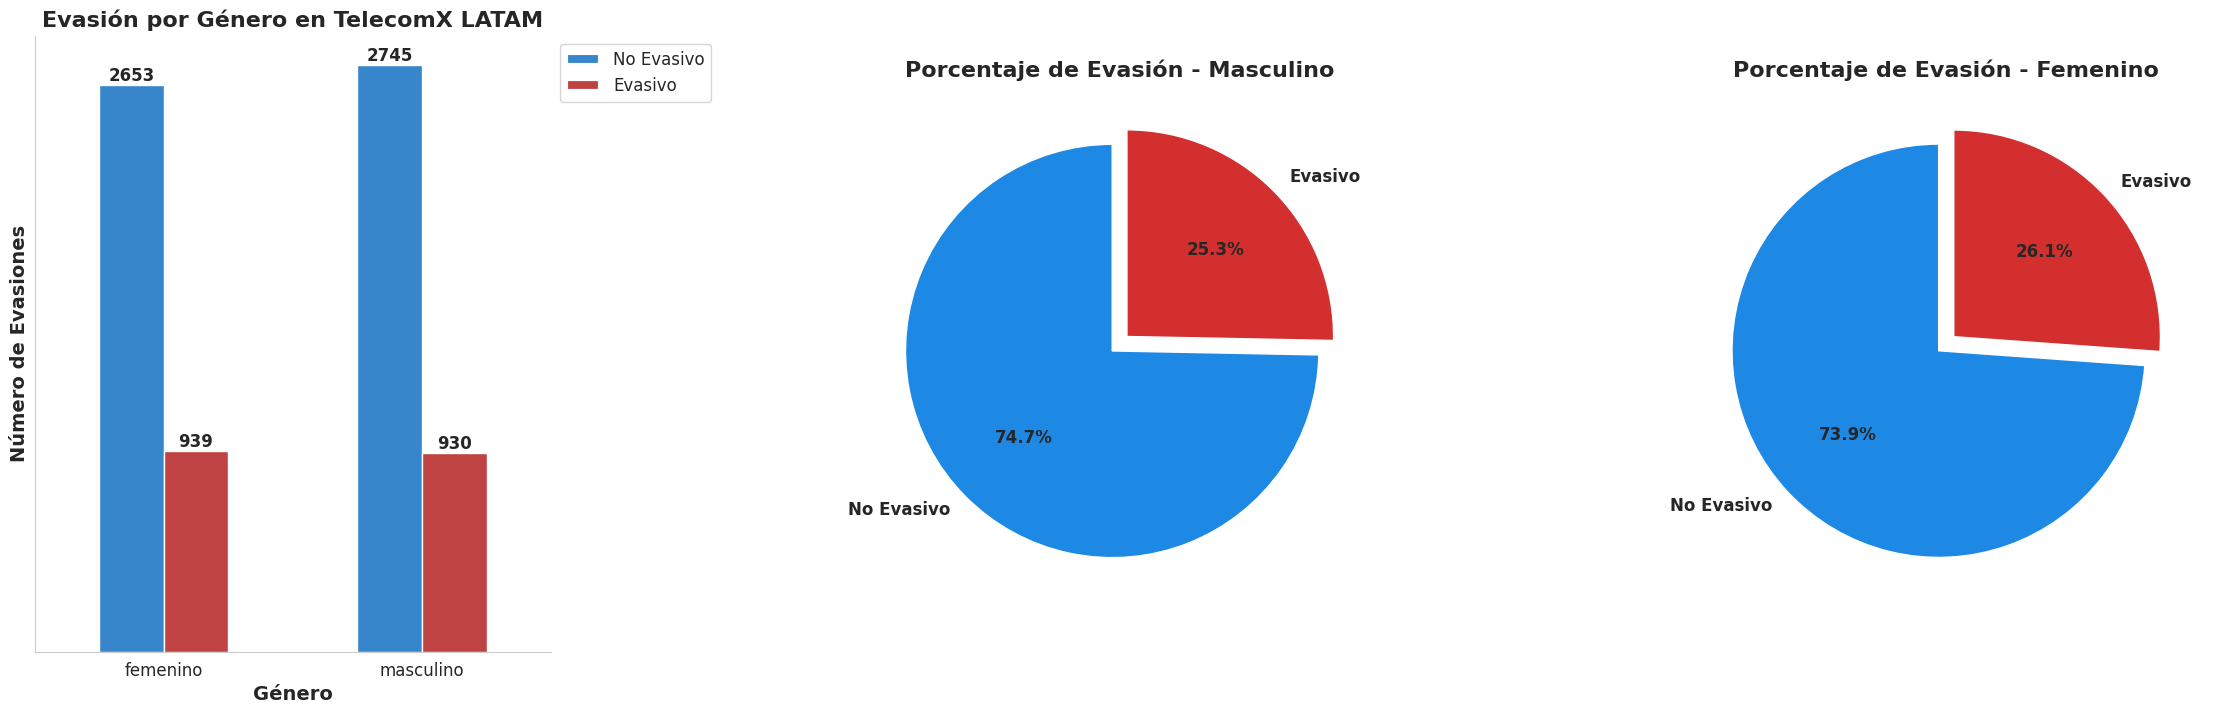

In [85]:
# 🔹 ** Creación de gráfico GÉNERO-EVASIÓN

# 🔹 **Crear subplots con mejor proporción**
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(28, 8), gridspec_kw={'width_ratios': [3, 3, 3]}, )
sns.set_style("whitegrid")

# 🔹 **Generar la tabla con el conteo de evasión por Género**
# Corrected: Apply .size() after the groupby operation
conteo_evasion_genero = datos_telecomx_final.groupby(["Género", "Evasión"], observed=True).size().unstack(fill_value=0)

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_genero_melted = conteo_evasion_genero.reset_index().melt(id_vars="Género", var_name="Evasión", value_name="Count")

# 🔹 **Extraer valores de evasión por género**
masculino_values = conteo_evasion_genero.loc["masculino", :].values
femenino_values = conteo_evasion_genero.loc["femenino", :].values
labels = ["No Evasivo", "Evasivo"]

#####################################################################################################################################################################################

### 📊 **Gráfico de barras (Evasión por Género)**
sns.barplot(
    x='Género',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_genero_melted,
    palette=["#1E88E5", "#D32F2F"],
    width=0.5,
    ax=axs[0]
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Género en TelecomX LATAM", fontsize=16, fontweight="bold")  # Título más grande
axs[0].set_xlabel("Género", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])



# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)

#####################################################################################################################################################################################

# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética

#####################################################################################################################################################################################

### 🔵 **Gráfico circular para Masculino**
axs[1].pie(
    masculino_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Aumentar tamaño de etiquetas en el gráfico circular
)
axs[1].set_title("Porcentaje de Evasión - Masculino", fontsize=16, fontweight="bold")

# Establecer un color de fondo diferente para cada gráfico
axs[1].set_facecolor("#FFF3E0")  # Beige

##########################################################################################

### 🔵 **Gráfico circular para Femenino**
axs[2].pie(
    femenino_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[2].set_title("Porcentaje de Evasión - Femenino", fontsize=16, fontweight="bold")

#####################################################################################################################################################################################

# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=0.6)

plt.show()


#### Gráfico del Recuento por Evasión - Líneas Múltiples

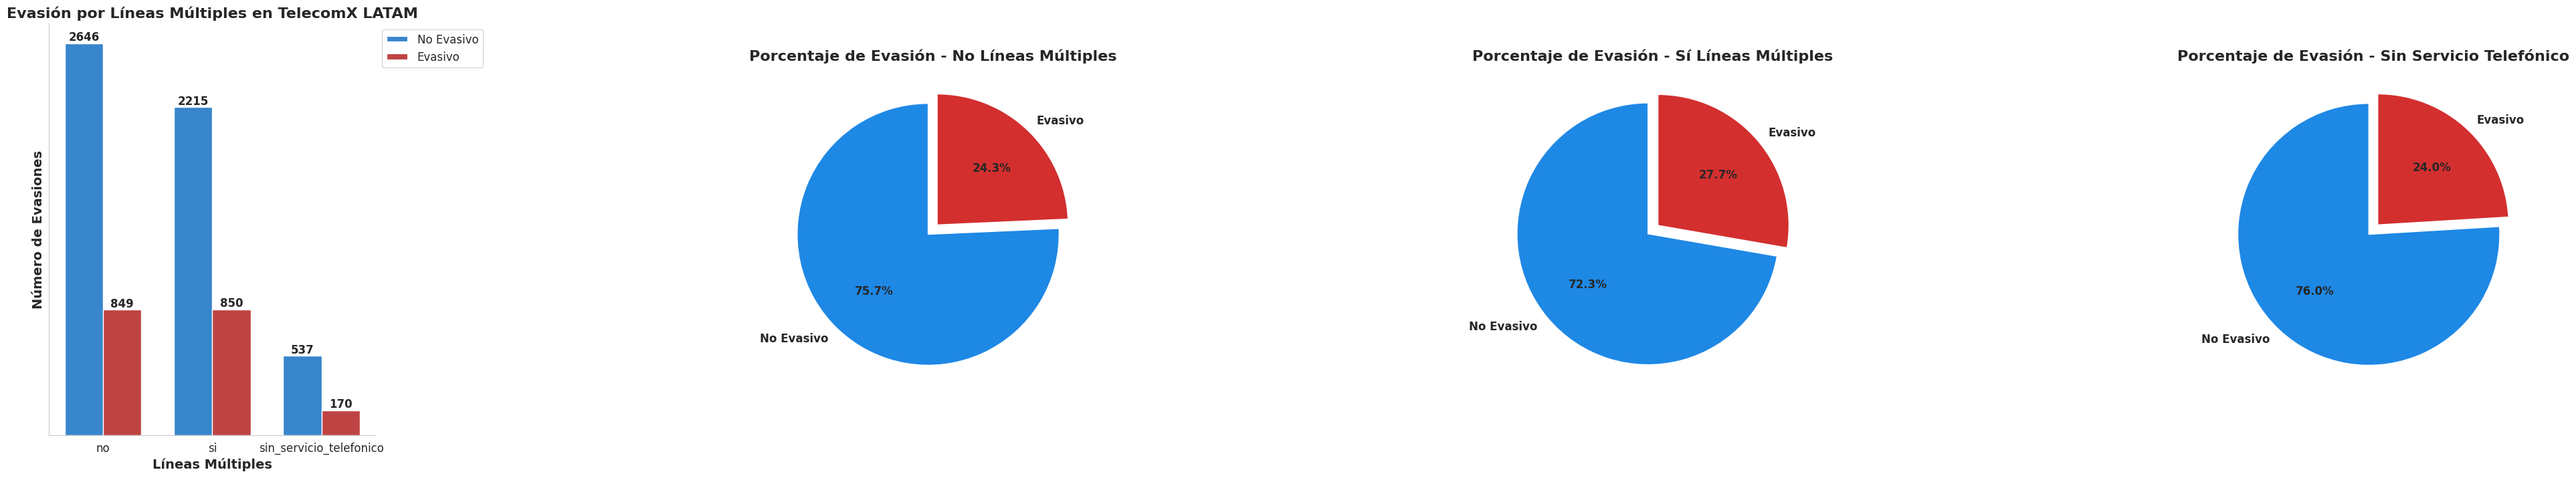

In [86]:
# 🔹 ** Creación de gráfico Líneas_Múltiples - Evasión



# 🔹 **Crear subplots con mejor proporción**
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(48, 8), gridspec_kw={'width_ratios': [3, 3, 3, 3]}, )
sns.set_style("whitegrid")

# 🔹 **Generar la tabla con el conteo de evasión por Líneas_Múltiples**
conteo_evasion_Líneas_Múltiples = datos_telecomx_final.groupby(["Líneas_Múltiples", "Evasión"], observed=True).size().unstack(fill_value=0)

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Líneas_Múltiples_melted = conteo_evasion_Líneas_Múltiples.reset_index().melt(id_vars="Líneas_Múltiples", var_name="Evasión", value_name="Count")

# 🔹 **Extraer valores de evasión por género**
no_values = conteo_evasion_Líneas_Múltiples.loc["no", :].values
si_values = conteo_evasion_Líneas_Múltiples.loc["si", :].values
# Check if "sin_servicio_telefonico" exists in the index before accessing it
if "sin_servicio_telefonico" in conteo_evasion_Líneas_Múltiples.index:
    sin_servicio_telefonico_values = conteo_evasion_Líneas_Múltiples.loc["sin_servicio_telefonico", :].values
else:
    sin_servicio_telefonico_values = [0, 0] # Assign zeros if the category is not present

labels = ["No Evasivo", "Evasivo"]



#####################################################################################################################################################################################



### 📊 **Gráfico de barras (Evasión por Líneas_Múltiples)**
sns.barplot(
    x='Líneas_Múltiples',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Líneas_Múltiples_melted,
    palette=["#1E88E5", "#D32F2F",],
    width=0.7,
    ax=axs[0]
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Líneas Múltiples en TelecomX LATAM", fontsize=16, fontweight="bold")  # Título más grande
axs[0].set_xlabel("Líneas Múltiples", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética



#####################################################################################################################################################################################



### 🔵 **Gráfico circular para los que << no >> cuentan con Líneas Múltiples**
axs[1].pie(
    no_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Aumentar tamaño de etiquetas en el gráfico circular
)
axs[1].set_title("Porcentaje de Evasión - No Líneas Múltiples", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que << si >> cuentan con Líneas Múltiples**
axs[2].pie(
    si_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[2].set_title("Porcentaje de Evasión - Sí Líneas Múltiples", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que << sin servicio telefónico >>**
axs[3].pie(
    sin_servicio_telefonico_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[3].set_title("Porcentaje de Evasión - Sin Servicio Telefónico", fontsize=16, fontweight="bold")



#####################################################################################################################################################################################



# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=1.2)

plt.show()

#### Gráfico del Recuento por Evasión - Servicio de Internet

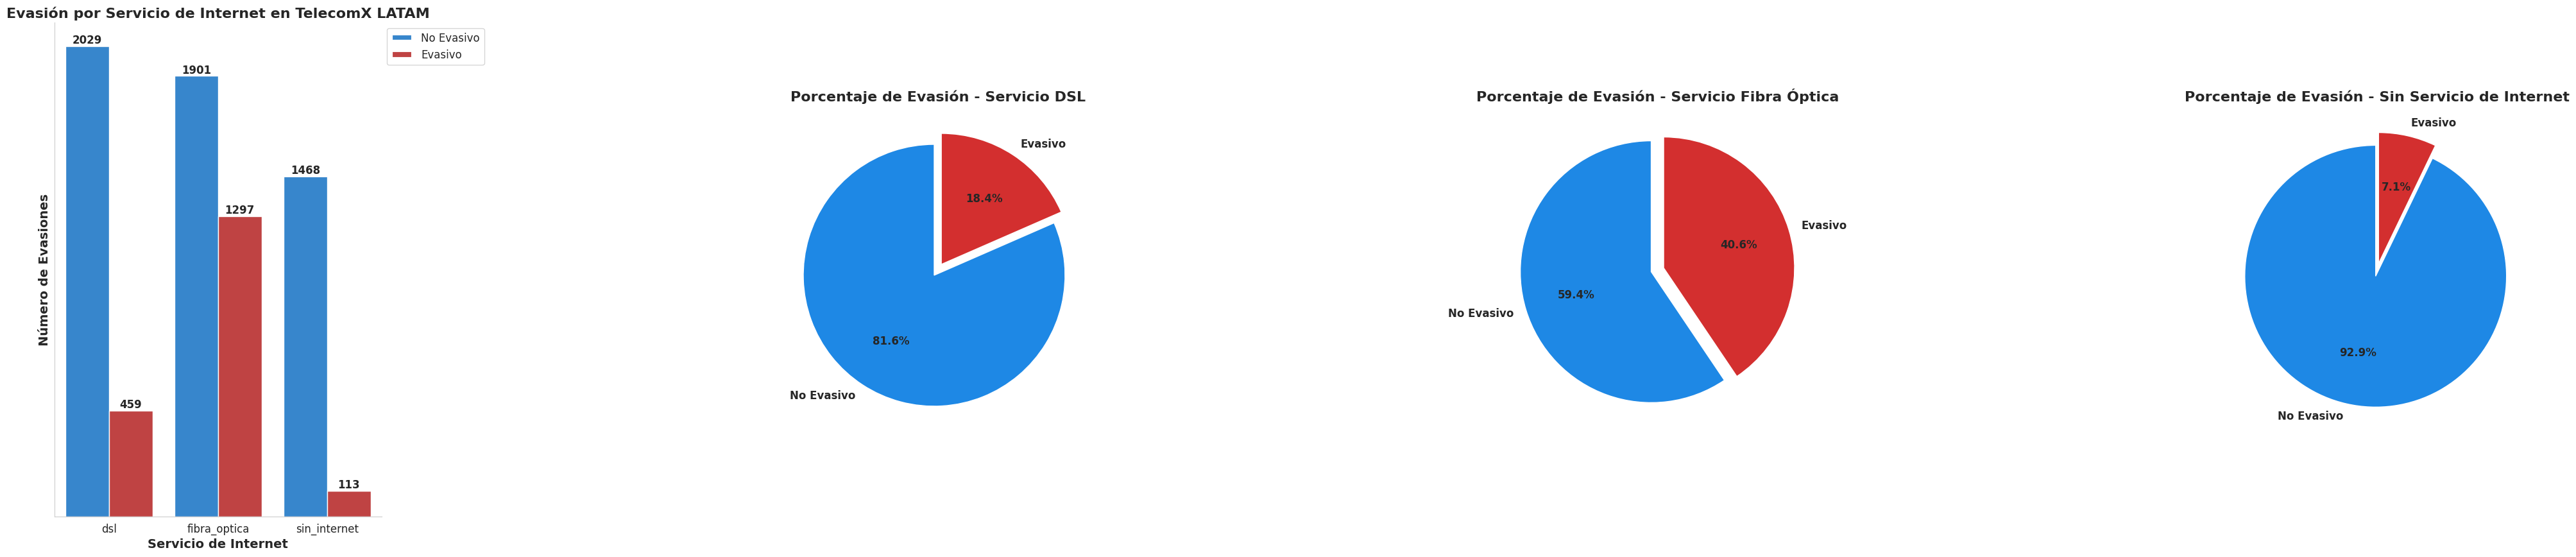

In [87]:
# 🔹 ** Creación de gráfico Servicio_Internet - Evasión



# 🔹 **Crear subplots con mejor proporción**
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(50, 10), gridspec_kw={'width_ratios': [3, 3, 3, 3]}, )
sns.set_style("whitegrid")

# 🔹 **Generar la tabla con el conteo de evasión por Servicio_Internet**
conteo_evasion_Servicio_Internet = datos_telecomx_final.groupby(["Servicio_Internet", "Evasión"], observed=True).size().unstack(fill_value=0)

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Servicio_Internet_melted = conteo_evasion_Servicio_Internet.reset_index().melt(id_vars="Servicio_Internet", var_name="Evasión", value_name="Count")

# 🔹 **Extraer valores de evasión por Servicio_Internet**
dsl_values = conteo_evasion_Servicio_Internet.loc["dsl", :].values
fibra_optica_values = conteo_evasion_Servicio_Internet.loc["fibra_optica", :].values

# Checa si "sin_servicio_telefonico" existe en el índice antes de accesar a el
if "sin_internet" in conteo_evasion_Servicio_Internet.index:
    sin_internet_values = conteo_evasion_Servicio_Internet.loc["sin_internet", :].values
else:
    sin_internet_values = [0, 0] # Asignación del "0" si la categoría no esta presente

labels = ["No Evasivo", "Evasivo"]



#####################################################################################################################################################################################



### 📊 **Gráfico de barras (Evasión por Servicio_Internet)**
sns.barplot(
    x='Servicio_Internet',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Servicio_Internet_melted,
    palette=["#1E88E5", "#D32F2F",],
    width=0.8,
    ax=axs[0]
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Servicio de Internet en TelecomX LATAM", fontsize=16, fontweight="bold")  # Título más grande
axs[0].set_xlabel("Servicio de Internet", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética



#####################################################################################################################################################################################



### 🔵 **Gráfico circular para los que cuentan con << DSL >> en Servicio de Internet**
axs[1].pie(
    dsl_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Aumentar tamaño de etiquetas en el gráfico circular
)
axs[1].set_title("Porcentaje de Evasión - Servicio DSL", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que cuentan con << Fibra Óptica >> en Servicio de Internet**
axs[2].pie(
    fibra_optica_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[2].set_title("Porcentaje de Evasión - Servicio Fibra Óptica", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que << sin servicio telefónico >>**
axs[3].pie(
    sin_internet_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[3].set_title("Porcentaje de Evasión - Sin Servicio de Internet", fontsize=16, fontweight="bold")



#####################################################################################################################################################################################



# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=1.2)

plt.show()

#### Gráfico del Recuento por Evasión - Seguridad en Línea

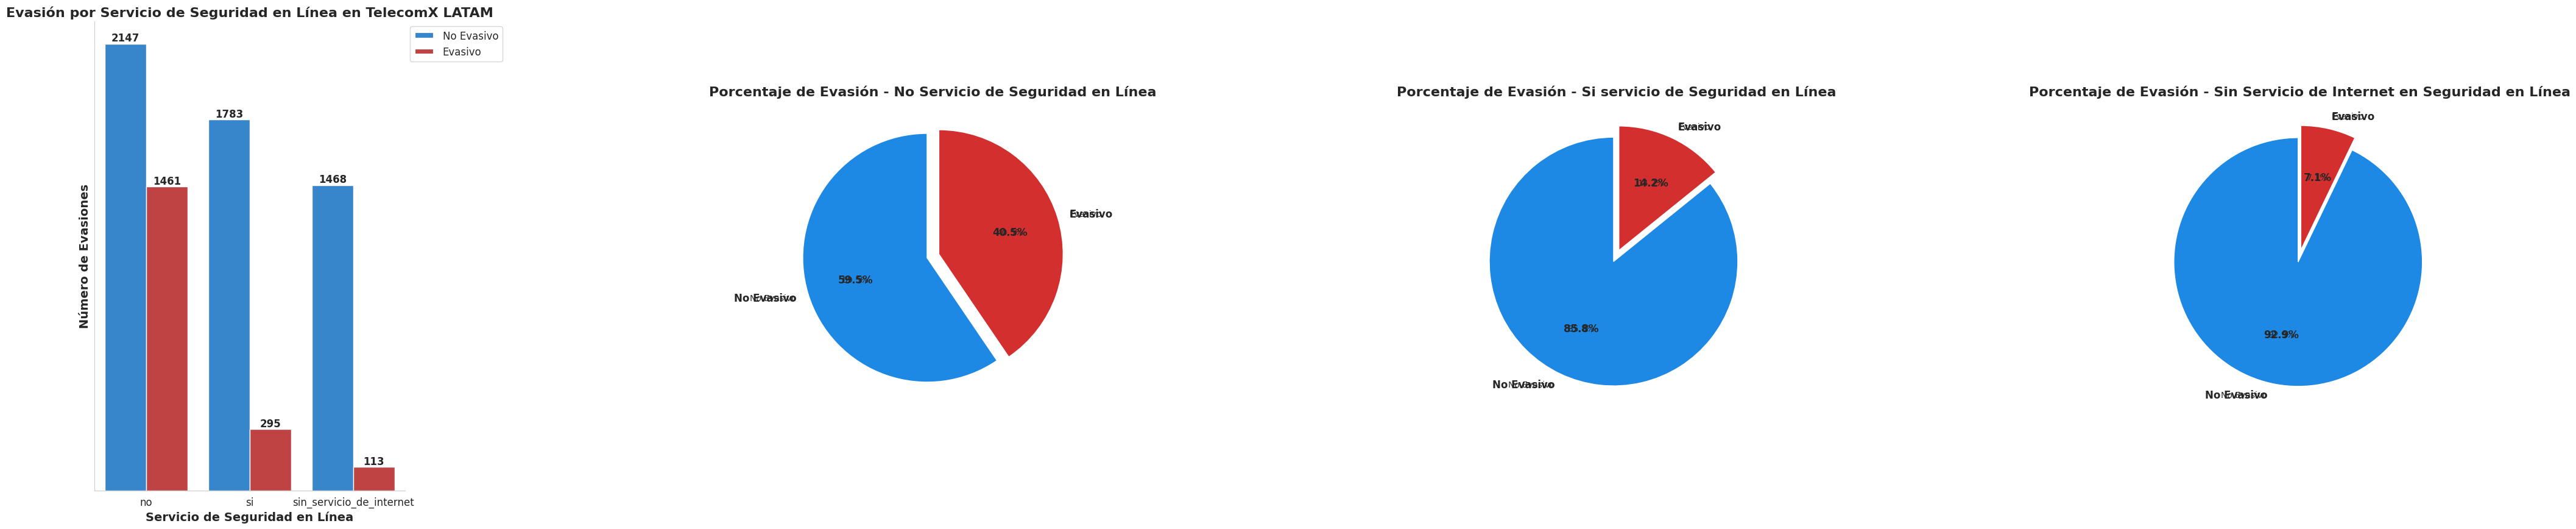

In [88]:
# 🔹 ** Creación de gráfico Seguridad_En_Línea - Evasión


# 🔹 **Crear subplots con mejor proporción**
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(50, 10), gridspec_kw={'width_ratios': [4, 4, 4, 4]})


# 🔹 **Generar la tabla con el conteo de evasión por Seguridad_En_Línea**
conteo_evasion_Seguridad_En_Línea = datos_telecomx_final.groupby(["Seguridad_En_Línea", "Evasión"], observed=True).size().unstack(fill_value=0)


# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Seguridad_En_Línea_melted = conteo_evasion_Seguridad_En_Línea.reset_index().melt(id_vars="Seguridad_En_Línea", var_name="Evasión", value_name="Count")


# 🔹 **Extraer valores de evasión por género**
no_values = conteo_evasion_Seguridad_En_Línea.loc["no", :].values
si_values = conteo_evasion_Seguridad_En_Línea.loc["si", :].values


# Checa si "sin_servicio_telefonico" existe en el índice antes de accesar a el
if "sin_servicio_de_internet" in conteo_evasion_Seguridad_En_Línea.index:
    sin_servicio_de_internet_values = conteo_evasion_Seguridad_En_Línea.loc["sin_servicio_de_internet", :].values
else:
    sin_servicio_de_internet_values = [0, 0] # Asignación del "0" si la categoría no esta presente

labels = ["No Evasivo", "Evasivo"]

axs[1].patch.set_facecolor("#E3F2FD")
axs[1].pie(no_values, labels=labels, autopct="%1.1f%%", colors=["#1E88E5", "#D32F2F"], startangle=90, explode=[0.05, 0.05])

axs[2].patch.set_facecolor("#FCE4EC")
axs[2].pie(si_values, labels=labels, autopct="%1.1f%%", colors=["#1E88E5", "#D32F2F"], startangle=90, explode=[0.05, 0.05])

axs[3].patch.set_facecolor("#D1C4E9")
axs[3].pie(sin_servicio_de_internet_values, labels=labels, autopct="%1.1f%%", colors=["#1E88E5", "#D32F2F"], startangle=90, explode=[0.05, 0.05])

#####################################################################################################################################################################################



### 📊 **Gráfico de barras (Evasión por Servicio_Internet)**
sns.barplot(
    x='Seguridad_En_Línea',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Seguridad_En_Línea_melted,
    palette=["#1E88E5", "#D32F2F",],
    width=0.8,
    ax=axs[0]
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Servicio de Seguridad en Línea en TelecomX LATAM", fontsize=16, fontweight="bold")  # Título más grande
axs[0].set_xlabel("Servicio de Seguridad en Línea", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética



#####################################################################################################################################################################################




### 🔵 **Gráfico circular para  << no >> servicio de Seguridad en Línea**
axs[1].pie(
    no_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Aumentar tamaño de etiquetas en el gráfico circular
)
axs[1].set_title("Porcentaje de Evasión - No Servicio de Seguridad en Línea", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para << si >> servicio de Seguridad en Línea**
axs[2].pie(
    si_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[2].set_title("Porcentaje de Evasión - Si servicio de Seguridad en Línea", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para << sin_servicio_de_internet >> en servicio de Seguridad en Línea**

axs[3].pie(
    sin_servicio_de_internet_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[3].set_title("Porcentaje de Evasión - Sin Servicio de Internet en Seguridad en Línea", fontsize=16, fontweight="bold")



#####################################################################################################################################################################################



# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=1.2)

plt.show()

#### Gráfico del Recuento por Evasión - Respaldo en Línea

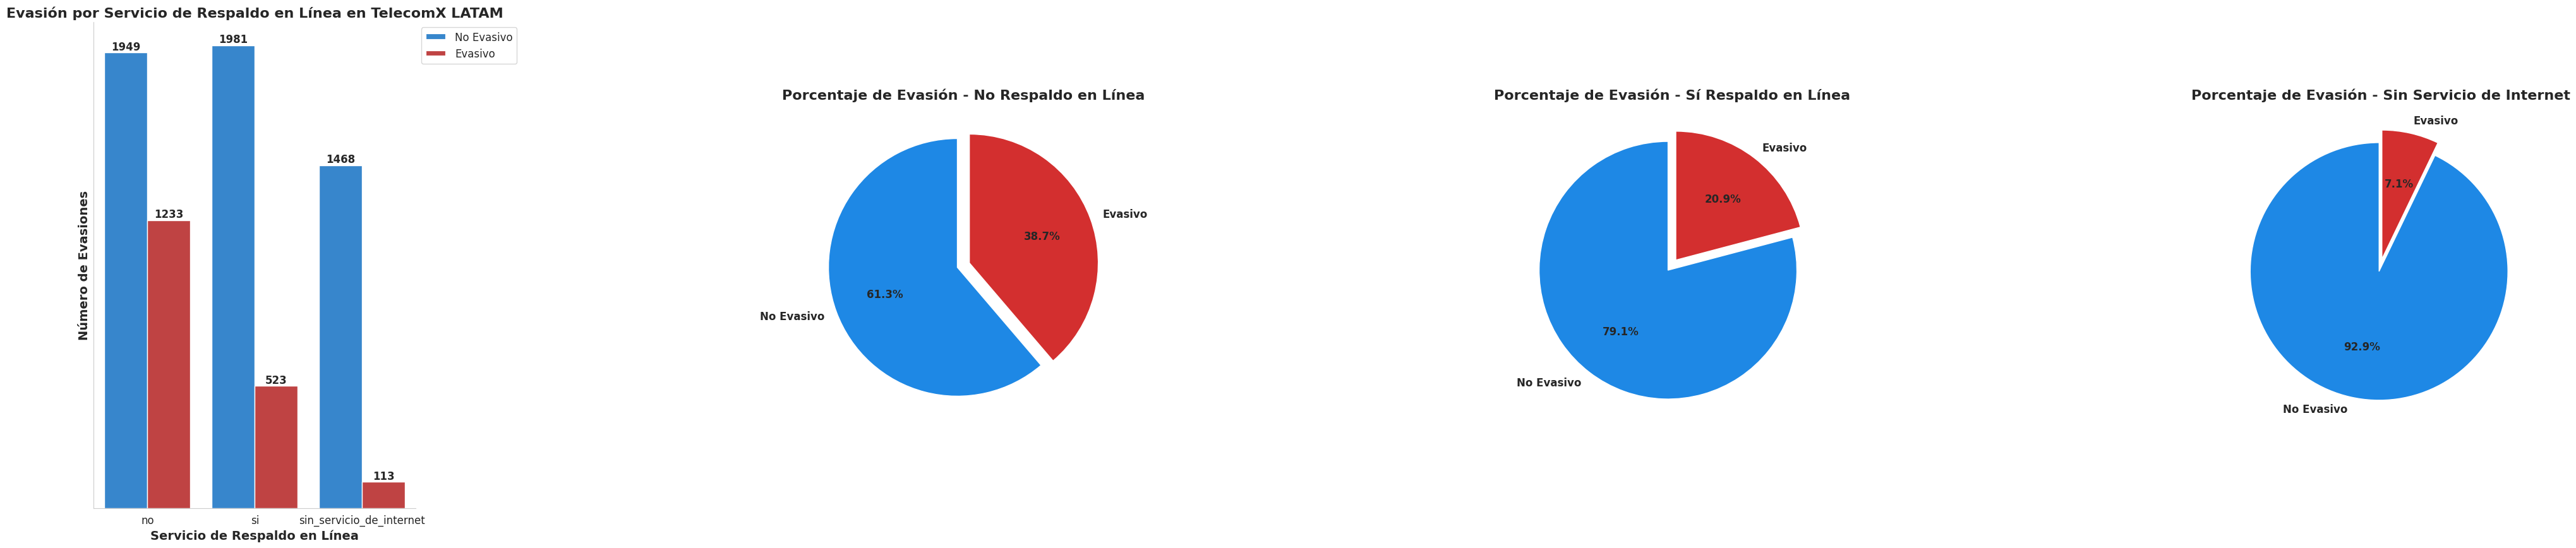

In [89]:
# 🔹 ** Creación de gráfico Respaldo_En_Línea - Evasión



# 🔹 **Crear subplots con mejor proporción**
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(50, 10), gridspec_kw={'width_ratios': [3, 3, 3, 3]}, )
sns.set_style("whitegrid")

# 🔹 **Generar la tabla con el conteo de evasión por Respaldo_En_Línea**
conteo_evasion_Respaldo_En_Línea = datos_telecomx_final.groupby(["Respaldo_En_Línea", "Evasión"], observed=True).size().unstack(fill_value=0)

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Respaldo_En_Línea_melted = conteo_evasion_Respaldo_En_Línea.reset_index().melt(id_vars="Respaldo_En_Línea", var_name="Evasión", value_name="Count")



# 🔹 **Extraer valores de evasión por género**
no_values = conteo_evasion_Respaldo_En_Línea.loc["no", :].values
si_values = conteo_evasion_Respaldo_En_Línea.loc["si", :].values

# Checa si "sin_servicio_telefonico" existe en el índice antes de accesar a el
if "sin_servicio_de_internet" in conteo_evasion_Respaldo_En_Línea.index:
    sin_servicio_de_internet_values = conteo_evasion_Respaldo_En_Línea.loc["sin_servicio_de_internet", :].values
else:
    sin_servicio_de_internet_values = [0, 0] # Asignación del "0" si la categoría no esta presente

labels = ["No Evasivo", "Evasivo"]



#####################################################################################################################################################################################



### 📊 **Gráfico de barras (Evasión por Respaldo_En_Línea)**
sns.barplot(
    x='Respaldo_En_Línea',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Respaldo_En_Línea_melted,
    palette=["#1E88E5", "#D32F2F",],
    width=0.8,
    ax=axs[0]
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Servicio de Respaldo en Línea en TelecomX LATAM", fontsize=16, fontweight="bold")  # Título más grande
axs[0].set_xlabel("Servicio de Respaldo en Línea", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética



#####################################################################################################################################################################################



### 🔵 **Gráfico circular para los que << No >> cuentan con el servicio de Respaldo en Línea**
axs[1].pie(
    no_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Aumentar tamaño de etiquetas en el gráfico circular
)
axs[1].set_title("Porcentaje de Evasión - No Respaldo en Línea", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que << Sí >> cuentan con el servicio de Respaldo en Línea**
axs[2].pie(
    si_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[2].set_title("Porcentaje de Evasión - Sí Respaldo en Línea", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los << sin servicio de internet >> en el servicio de Respaldo en Línea**
axs[3].pie(
    sin_servicio_de_internet_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[3].set_title("Porcentaje de Evasión - Sin Servicio de Internet", fontsize=16, fontweight="bold")



#####################################################################################################################################################################################



# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=1.2)

plt.show()

#### Gráfico del Recuento por Evasión - Protección de Dispositivo

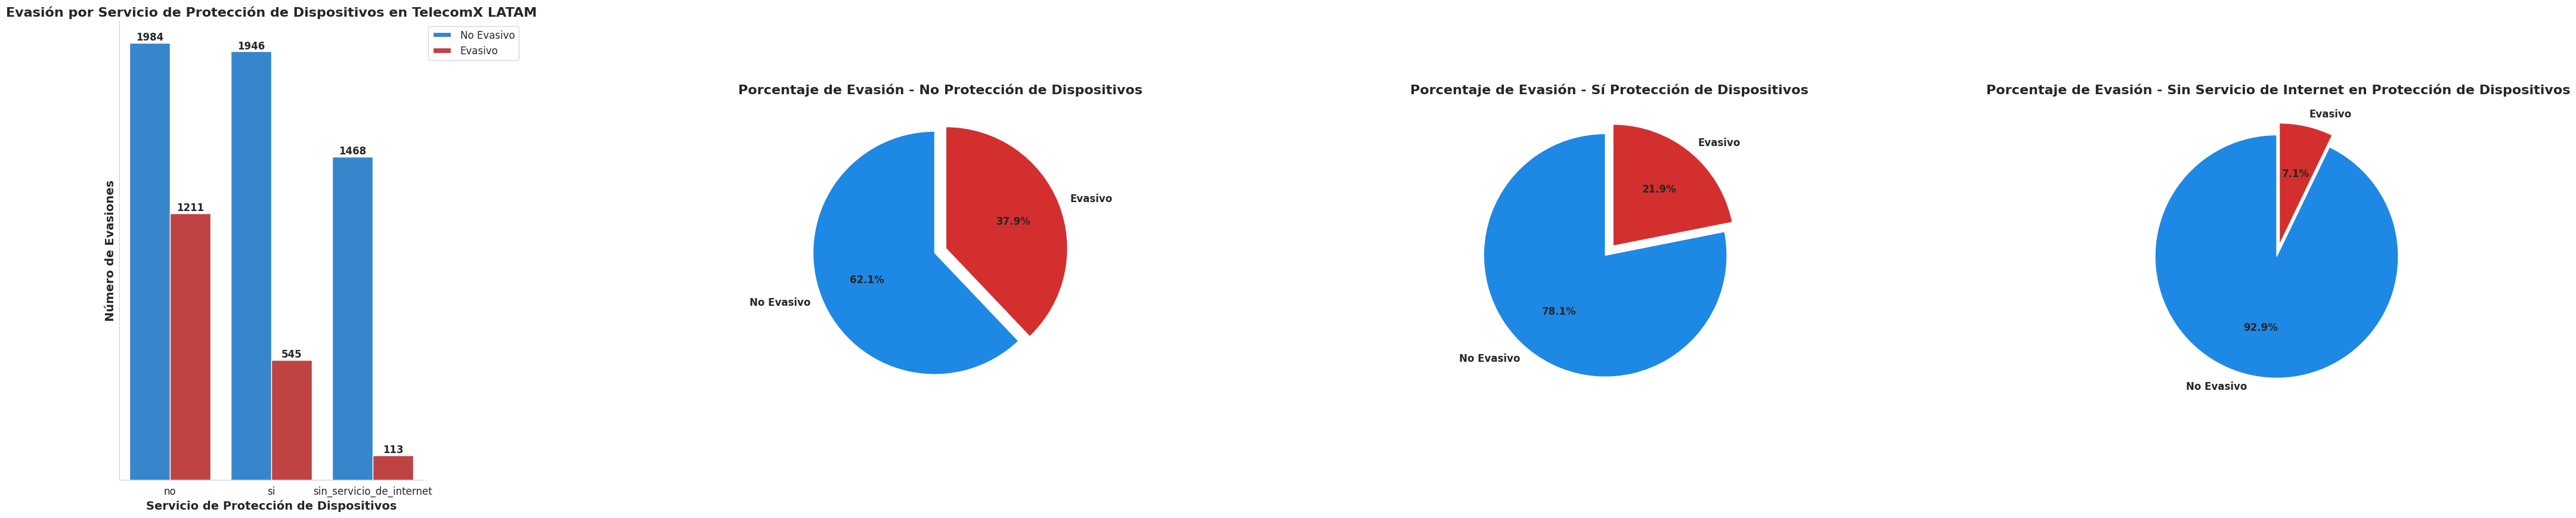

In [90]:
# 🔹 ** Creación de gráfico Protección_Dispositivo - Evasión



# 🔹 **Crear subplots con mejor proporción**
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(50, 10), gridspec_kw={'width_ratios': [3, 3, 3, 3]}, )
sns.set_style("whitegrid")

# 🔹 **Generar la tabla con el conteo de evasión por Protección_Dispositivo**
conteo_evasion_Protección_Dispositivo = datos_telecomx_final.groupby(["Protección_Dispositivo", "Evasión"], observed=True).size().unstack(fill_value=0)

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Protección_Dispositivo_melted = conteo_evasion_Protección_Dispositivo.reset_index().melt(id_vars="Protección_Dispositivo", var_name="Evasión", value_name="Count")



# 🔹 **Extraer valores de evasión por género**
no_values = conteo_evasion_Protección_Dispositivo.loc["no", :].values
si_values = conteo_evasion_Protección_Dispositivo.loc["si", :].values

# Checa si "sin_servicio_telefonico" existe en el índice antes de accesar a el
if "sin_servicio_de_internet" in conteo_evasion_Protección_Dispositivo.index:
    sin_servicio_de_internet_values = conteo_evasion_Protección_Dispositivo.loc["sin_servicio_de_internet", :].values
else:
    sin_servicio_de_internet_values = [0, 0] # Asignación del "0" si la categoría no esta presente

labels = ["No Evasivo", "Evasivo"]



#####################################################################################################################################################################################



### 📊 **Gráfico de barras (Evasión por Protección_Dispositivo)**
sns.barplot(
    x='Protección_Dispositivo',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Protección_Dispositivo_melted,
    palette=["#1E88E5", "#D32F2F",],
    width=0.8,
    ax=axs[0]
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Servicio de Protección de Dispositivos en TelecomX LATAM", fontsize=16, fontweight="bold")  # Título más grande
axs[0].set_xlabel("Servicio de Protección de Dispositivos", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética



#####################################################################################################################################################################################



### 🔵 **Gráfico circular para los que << No >> cuentan con el servicio de Protección de Dispositivos**
axs[1].pie(
    no_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Aumentar tamaño de etiquetas en el gráfico circular
)
axs[1].set_title("Porcentaje de Evasión - No Protección de Dispositivos", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que << Sí >> cuentan con el servicio de Protección de Dispositivos**
axs[2].pie(
    si_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[2].set_title("Porcentaje de Evasión - Sí Protección de Dispositivos", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los << sin servicio de internet >> en el servicio de Protección de Dispositivos**
axs[3].pie(
    sin_servicio_de_internet_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[3].set_title("Porcentaje de Evasión - Sin Servicio de Internet en Protección de Dispositivos", fontsize=16, fontweight="bold")



#####################################################################################################################################################################################



# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=1.2)

plt.show()

#### Gráfico del Recuento por Evasión - Soporte Técnico

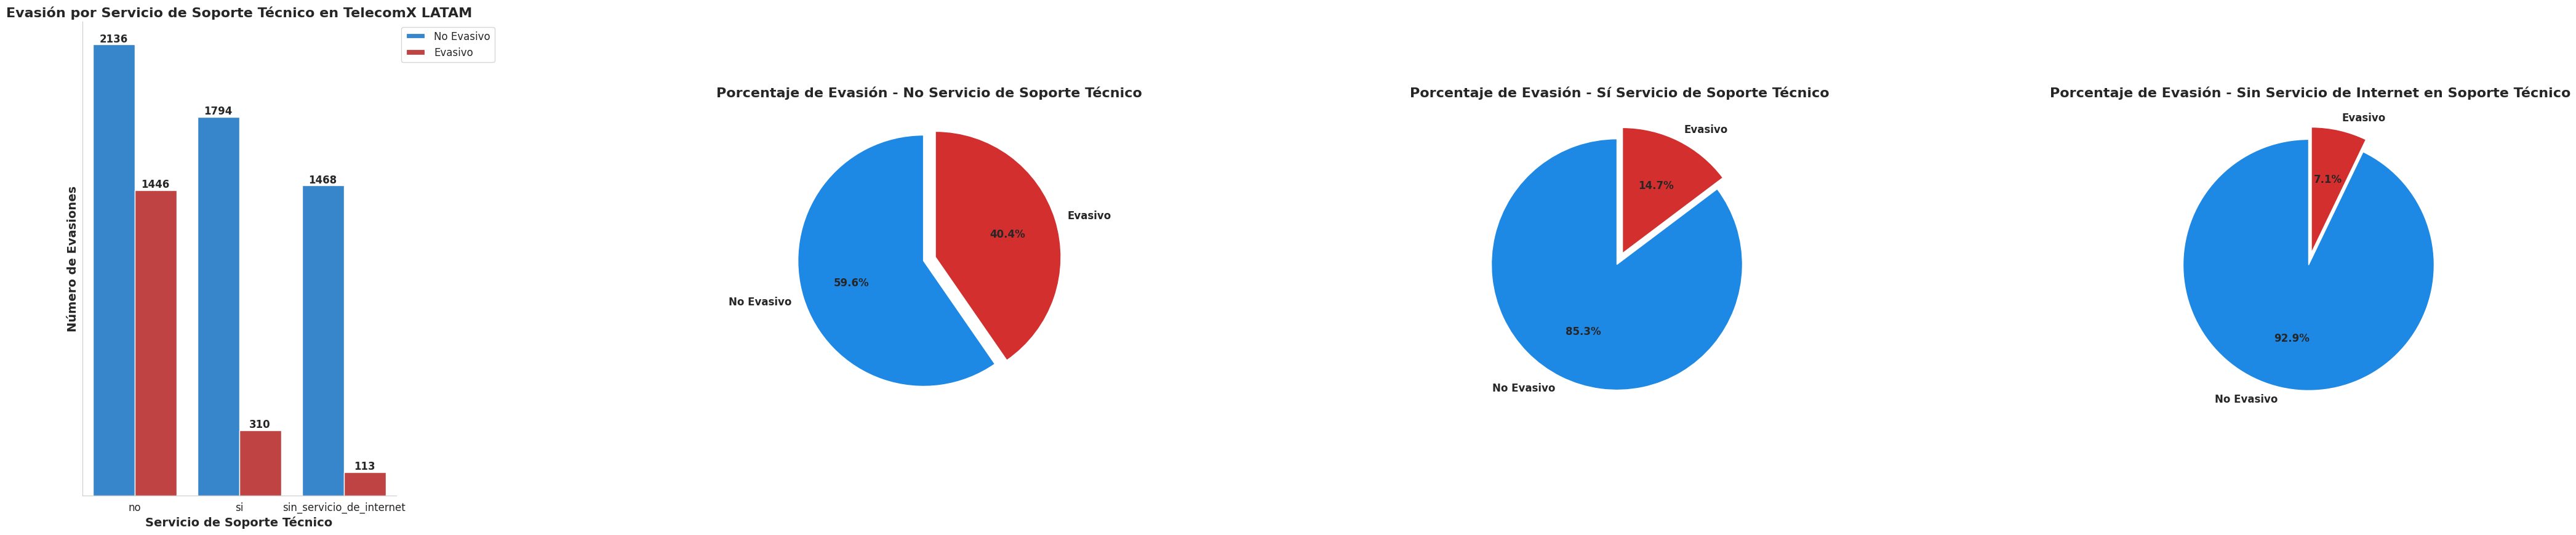

In [91]:
# 🔹 ** Creación de gráfico Soporte_Técnico - Evasión



# 🔹 **Crear subplots con mejor proporción**
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(50, 10), gridspec_kw={'width_ratios': [3, 3, 3, 3]}, )
sns.set_style("whitegrid")

# 🔹 **Generar la tabla con el conteo de evasión por Soporte_Técnico**
conteo_evasion_Soporte_Técnico = datos_telecomx_final.groupby(["Soporte_Técnico", "Evasión"], observed=True).size().unstack(fill_value=0)

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Soporte_Técnico_melted = conteo_evasion_Soporte_Técnico.reset_index().melt(id_vars="Soporte_Técnico", var_name="Evasión", value_name="Count")



# 🔹 **Extraer valores de evasión por género**
no_values = conteo_evasion_Soporte_Técnico.loc["no", :].values
si_values = conteo_evasion_Soporte_Técnico.loc["si", :].values

# Checa si "sin_servicio_telefonico" existe en el índice antes de accesar a el
if "sin_servicio_de_internet" in conteo_evasion_Soporte_Técnico.index:
    sin_servicio_de_internet_values = conteo_evasion_Soporte_Técnico.loc["sin_servicio_de_internet", :].values
else:
    sin_servicio_de_internet_values = [0, 0] # Asignación del "0" si la categoría no esta presente

labels = ["No Evasivo", "Evasivo"]



#####################################################################################################################################################################################



### 📊 **Gráfico de barras (Evasión por Soporte_Técnico)**
sns.barplot(
    x='Soporte_Técnico',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Soporte_Técnico_melted,
    palette=["#1E88E5", "#D32F2F",],
    width=0.8,
    ax=axs[0]
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Servicio de Soporte Técnico en TelecomX LATAM", fontsize=16, fontweight="bold")  # Título más grande
axs[0].set_xlabel("Servicio de Soporte Técnico", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética



#####################################################################################################################################################################################



### 🔵 **Gráfico circular para los que << No >> cuentan con el servicio de Soporte Técnico**
axs[1].pie(
    no_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Aumentar tamaño de etiquetas en el gráfico circular
)
axs[1].set_title("Porcentaje de Evasión - No Servicio de Soporte Técnico", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que << Sí >> cuentan con el servicio de Soporte Técnico**
axs[2].pie(
    si_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[2].set_title("Porcentaje de Evasión - Sí Servicio de Soporte Técnico", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los << sin servicio de internet >> en el servicio de Soporte Técnico**
axs[3].pie(
    sin_servicio_de_internet_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[3].set_title("Porcentaje de Evasión - Sin Servicio de Internet en Soporte Técnico", fontsize=16, fontweight="bold")



#####################################################################################################################################################################################



# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=1.2)

plt.show()

#### Gráfico del Recuento por Evasión -{ TV Streaming

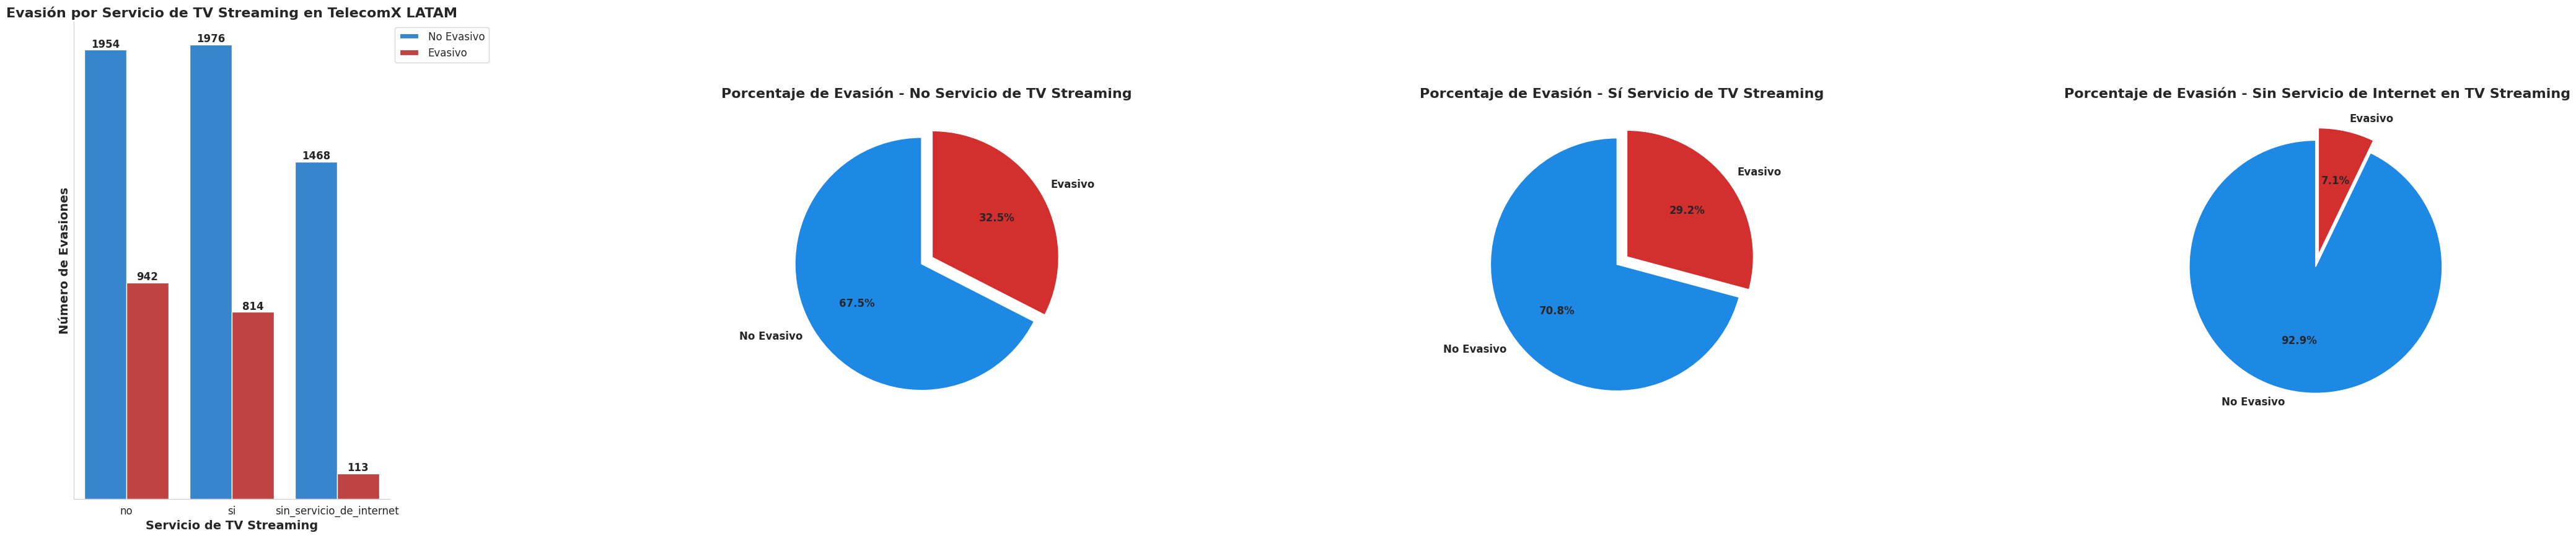

In [92]:
# 🔹 ** Creación de gráfico TV_Streaming - Evasión



# 🔹 **Crear subplots con mejor proporción**
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(50, 10), gridspec_kw={'width_ratios': [3, 3, 3, 3]}, )
sns.set_style("whitegrid")

# 🔹 **Generar la tabla con el conteo de evasión por TV_Streaming**
conteo_evasion_TV_Streaming = datos_telecomx_final.groupby(["TV_Streaming", "Evasión"], observed=True).size().unstack(fill_value=0)

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_TV_Streaming_melted = conteo_evasion_TV_Streaming.reset_index().melt(id_vars="TV_Streaming", var_name="Evasión", value_name="Count")



# 🔹 **Extraer valores de evasión por género**
no_values = conteo_evasion_TV_Streaming.loc["no", :].values
si_values = conteo_evasion_TV_Streaming.loc["si", :].values

# Checa si "sin_servicio_telefonico" existe en el índice antes de accesar a el
if "sin_servicio_de_internet" in conteo_evasion_TV_Streaming.index:
    sin_servicio_de_internet_values = conteo_evasion_TV_Streaming.loc["sin_servicio_de_internet", :].values
else:
    sin_servicio_de_internet_values = [0, 0] # Asignación del "0" si la categoría no esta presente

labels = ["No Evasivo", "Evasivo"]



#####################################################################################################################################################################################



### 📊 **Gráfico de barras (Evasión por Protección_Dispositivo)**
sns.barplot(
    x='TV_Streaming',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_TV_Streaming_melted,
    palette=["#1E88E5", "#D32F2F",],
    width=0.8,
    ax=axs[0]
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Servicio de TV Streaming en TelecomX LATAM", fontsize=16, fontweight="bold")  # Título más grande
axs[0].set_xlabel("Servicio de TV Streaming", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética



#####################################################################################################################################################################################



### 🔵 **Gráfico circular para los que << No >> cuentan con el servicio de TV Streaming**
axs[1].pie(
    no_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Aumentar tamaño de etiquetas en el gráfico circular
)
axs[1].set_title("Porcentaje de Evasión - No Servicio de TV Streaming", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que << Sí >> cuentan con el servicio de TV Streaming**
axs[2].pie(
    si_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[2].set_title("Porcentaje de Evasión - Sí Servicio de TV Streaming", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los << sin servicio de internet >> en el servicio de TV Streaming**
axs[3].pie(
    sin_servicio_de_internet_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[3].set_title("Porcentaje de Evasión - Sin Servicio de Internet en TV Streaming", fontsize=16, fontweight="bold")



#####################################################################################################################################################################################



# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=1.2)

plt.show()

#### Gráfico del Recuento por Evasión - Películas Streaming

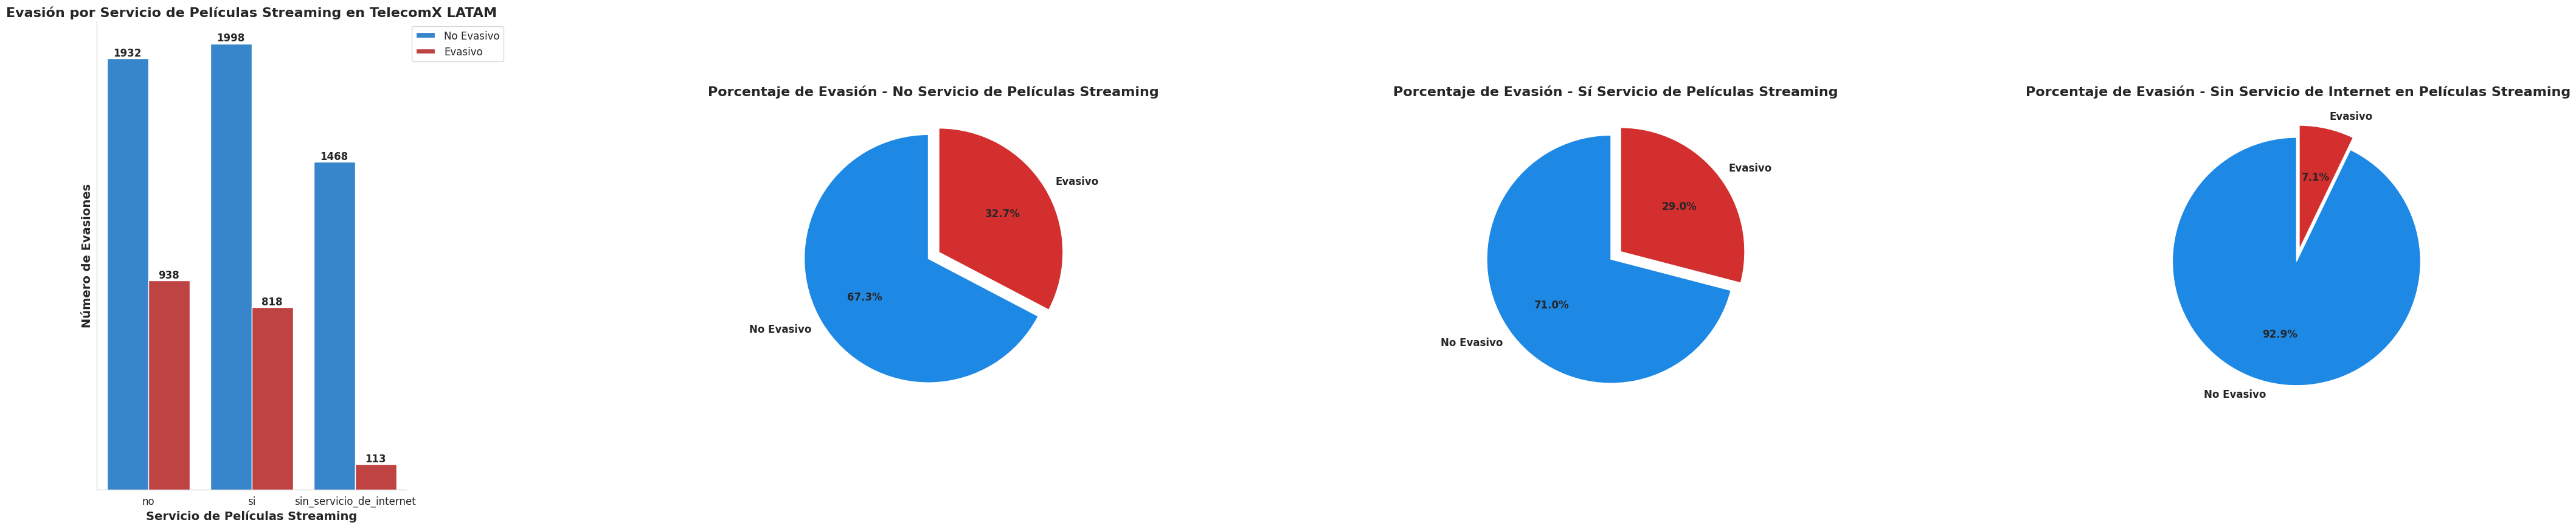

In [93]:
# 🔹 ** Creación de gráfico Películas_Streaming - Evasión



# 🔹 **Crear subplots con mejor proporción**
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(50, 10), gridspec_kw={'width_ratios': [3, 3, 3, 3]}, )
sns.set_style("whitegrid")

# 🔹 **Generar la tabla con el conteo de evasión por Películas_Streaming**
conteo_evasion_Películas_Streaming = datos_telecomx_final.groupby(["Películas_Streaming", "Evasión"], observed=True).size().unstack(fill_value=0)

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Películas_Streaming_melted = conteo_evasion_Películas_Streaming.reset_index().melt(id_vars="Películas_Streaming", var_name="Evasión", value_name="Count")



# 🔹 **Extraer valores de evasión por género**
no_values = conteo_evasion_Películas_Streaming.loc["no", :].values
si_values = conteo_evasion_Películas_Streaming.loc["si", :].values

# Checa si "sin_servicio_telefonico" existe en el índice antes de accesar a el
if "sin_servicio_de_internet" in conteo_evasion_Películas_Streaming.index:
    sin_servicio_de_internet_values = conteo_evasion_Películas_Streaming.loc["sin_servicio_de_internet", :].values
else:
    sin_servicio_de_internet_values = [0, 0] # Asignación del "0" si la categoría no esta presente

labels = ["No Evasivo", "Evasivo"]



#####################################################################################################################################################################################



### 📊 **Gráfico de barras (Evasión por Protección_Dispositivo)**
sns.barplot(
    x='Películas_Streaming',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Películas_Streaming_melted,
    palette=["#1E88E5", "#D32F2F",],
    width=0.8,
    ax=axs[0]
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Servicio de Películas Streaming en TelecomX LATAM", fontsize=16, fontweight="bold")  # Título más grande
axs[0].set_xlabel("Servicio de Películas Streaming", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética



#####################################################################################################################################################################################



### 🔵 **Gráfico circular para los que << No >> cuentan con el servicio de Películas Streaming**
axs[1].pie(
    no_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Aumentar tamaño de etiquetas en el gráfico circular
)
axs[1].set_title("Porcentaje de Evasión - No Servicio de Películas Streaming", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que << Sí >> cuentan con el servicio de Películas Streaming**
axs[2].pie(
    si_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[2].set_title("Porcentaje de Evasión - Sí Servicio de Películas Streaming", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los << sin servicio de internet >> en el servicio de Películas Streaming**
axs[3].pie(
    sin_servicio_de_internet_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[3].set_title("Porcentaje de Evasión - Sin Servicio de Internet en Películas Streaming", fontsize=16, fontweight="bold")



#####################################################################################################################################################################################



# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=1.2)

plt.show()

#### Gráfico del Recuento por Evasión - Tipo de Contrato

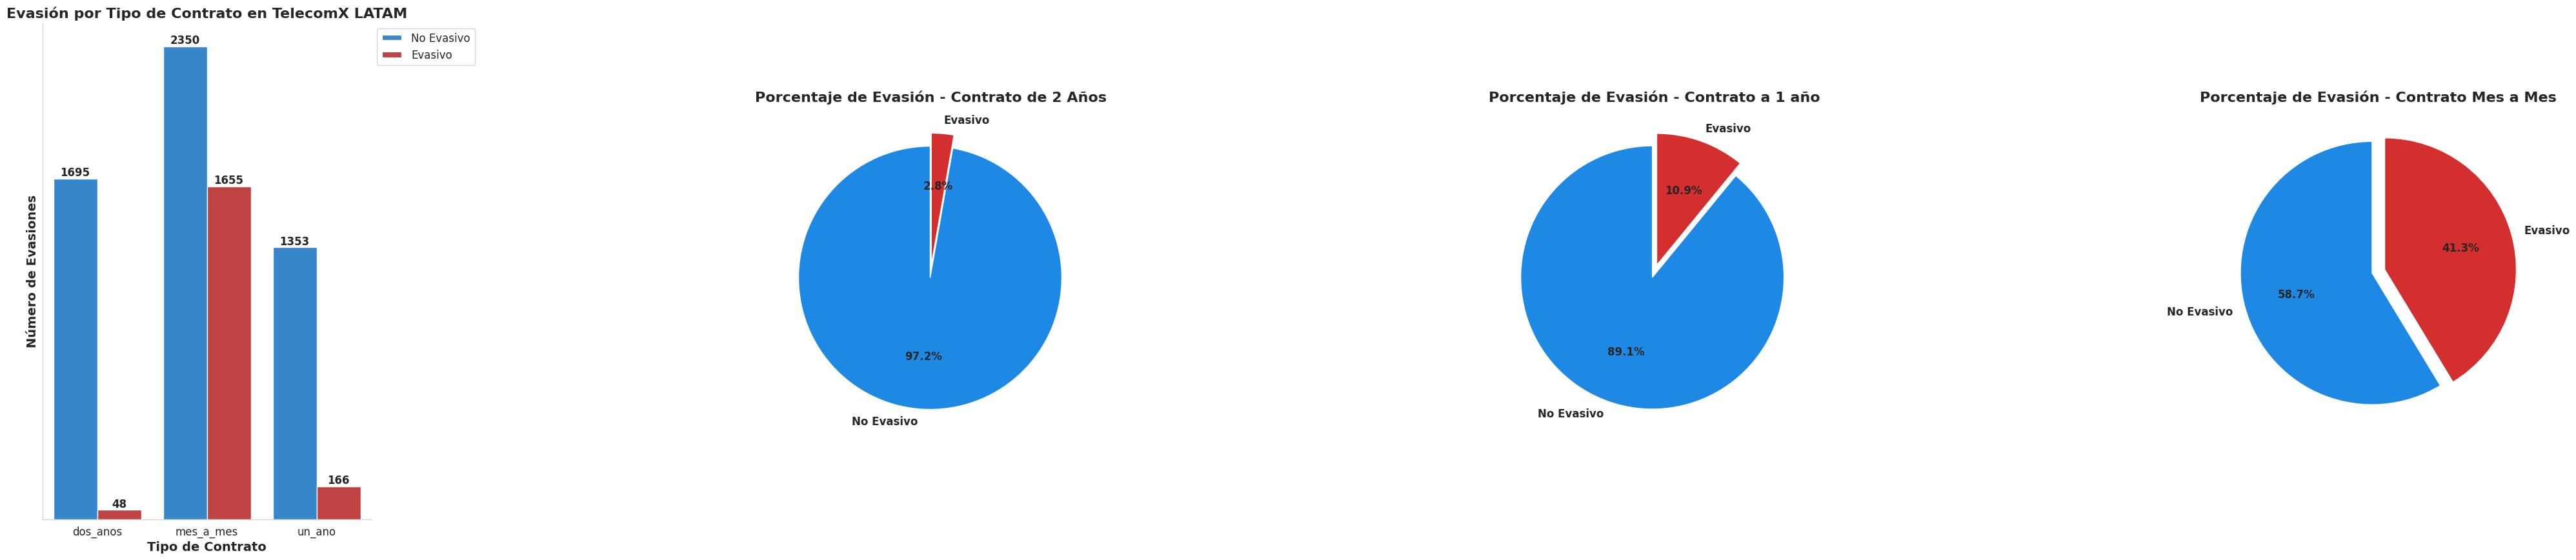

In [94]:
# 🔹 ** Creación de gráfico Contrato - Evasión



# 🔹 **Crear subplots con mejor proporción**
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(50, 10), gridspec_kw={'width_ratios': [3, 3, 3, 3]}, )
sns.set_style("whitegrid")

# 🔹 **Generar la tabla con el conteo de evasión por Contrato**
conteo_evasion_Contrato = datos_telecomx_final.groupby(["Contrato", "Evasión"], observed=True).size().unstack(fill_value=0)

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Contrato_melted = conteo_evasion_Contrato.reset_index().melt(id_vars="Contrato", var_name="Evasión", value_name="Count")



# 🔹 **Extraer valores de evasión por género**
dos_anos_values = conteo_evasion_Contrato.loc["dos_anos", :].values
un_anos_values = conteo_evasion_Contrato.loc["un_ano", :].values
mes_a_mes_values = conteo_evasion_Contrato.loc["mes_a_mes", :].values



labels = ["No Evasivo", "Evasivo"]



#####################################################################################################################################################################################



### 📊 **Gráfico de barras (Evasión por Contrato)**
sns.barplot(
    x='Contrato',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Contrato_melted,
    palette=["#1E88E5", "#D32F2F",],
    width=0.8,
    ax=axs[0]
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Tipo de Contrato en TelecomX LATAM", fontsize=16, fontweight="bold")  # Título más grande
axs[0].set_xlabel("Tipo de Contrato", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética



#####################################################################################################################################################################################



### 🔵 **Gráfico circular para los que tienen el tipo de Contrato a << 2 años >>**
axs[1].pie(
    dos_anos_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Aumentar tamaño de etiquetas en el gráfico circular
)
axs[1].set_title("Porcentaje de Evasión - Contrato de 2 Años", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que tienen el tipo de Contrato a << 1 año >>**
axs[2].pie(
    un_anos_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[2].set_title("Porcentaje de Evasión - Contrato a 1 año", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que tienen el tipo de Contrato a << mes a mes >>**
axs[3].pie(
    mes_a_mes_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[3].set_title("Porcentaje de Evasión - Contrato Mes a Mes", fontsize=16, fontweight="bold")



#####################################################################################################################################################################################



# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=1.2)

plt.show()

#### Gráfico del Recuento por Evasión - Método de Pago

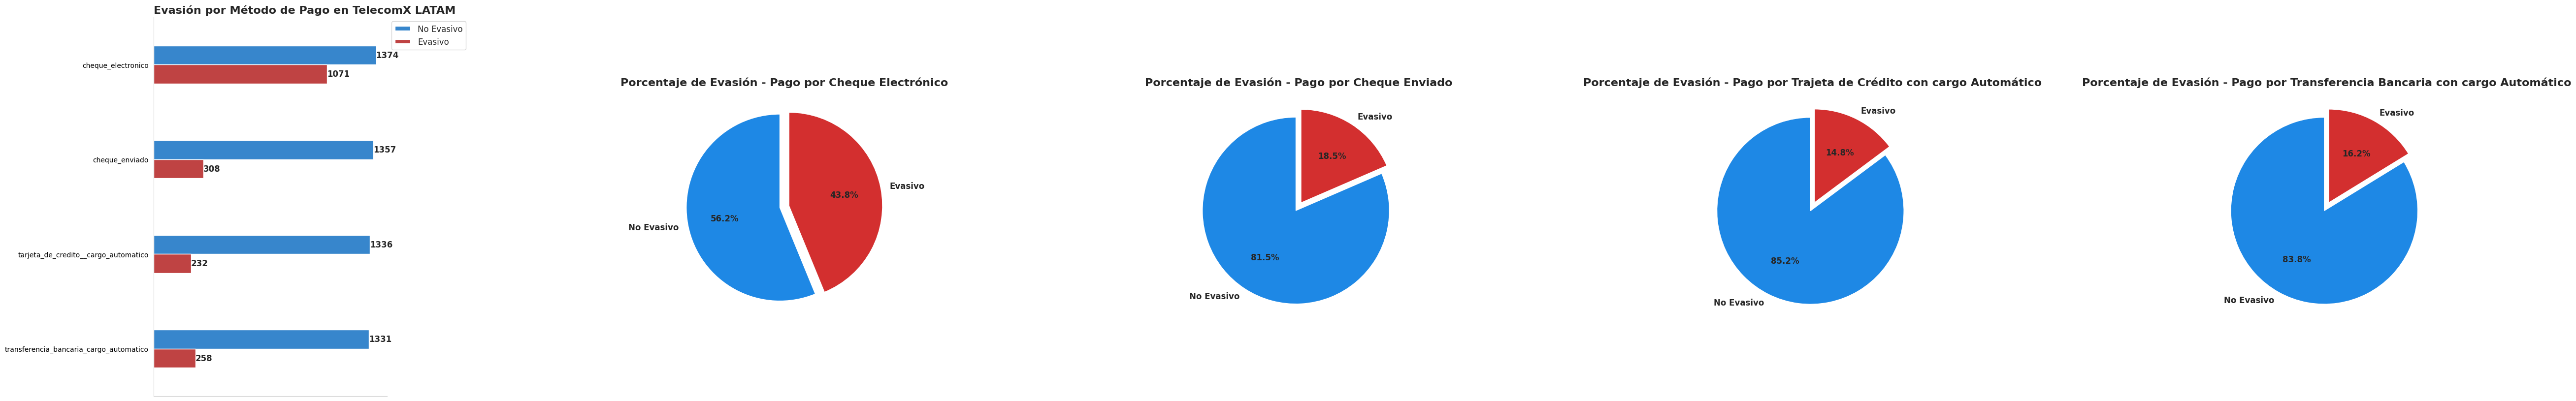

In [95]:
# 🔹 ** Creación de gráfico Método_Pago - Evasión

# 🔹 **Crear subplots con mejor proporción**
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(60, 10), gridspec_kw={'width_ratios': [3, 3, 3, 3, 3]}, ) # Changed ncols to 5 and added a width ratio
sns.set_style("whitegrid")

# 🔹 **Generar la tabla con el conteo de evasión por Método_Pago**
conteo_evasion_Método_Pago = datos_telecomx_final.groupby(["Método_Pago", "Evasión"], observed=True).size().unstack(fill_value=0)

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Método_Pago_melted = conteo_evasion_Método_Pago.reset_index().melt(id_vars="Método_Pago", var_name="Evasión", value_name="Count")



# 🔹 **Extraer valores de evasión por género**
cheque_electronico_values = conteo_evasion_Método_Pago.loc["cheque_electronico", :].values
cheque_enviado_values = conteo_evasion_Método_Pago.loc["cheque_enviado", :].values
tarjeta_de_credito__cargo_automatico_values = conteo_evasion_Método_Pago.loc["tarjeta_de_credito__cargo_automatico", :].values
transferencia_bancaria_cargo_automatico_values = conteo_evasion_Método_Pago.loc["transferencia_bancaria_cargo_automatico", :].values



labels = ["No Evasivo", "Evasivo"]



#####################################################################################################################################################################################



### 📊 **Gráfico de barras (Evasión por Método_Pago)**
sns.barplot(
    x='Count',
    y='Método_Pago',
    hue='Evasión',
    data=conteo_evasion_Método_Pago_melted,
    palette=["#1E88E5", "#D32F2F",],
    width=0.4,
    ax=axs[0],
    orient='h',
    linewidth=1,
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_xlabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].xaxis.set_visible(False)

##Datos de la configuración de la gráfica
axs[0].set_title('Evasión por Método de Pago en TelecomX LATAM', loc='left', fontsize=16, fontweight="bold")
axs[0].set_ylabel('')
axs[0].set_xlabel('Número de Evasiones')
axs[0].yaxis.set_tick_params(labelsize=10, labelcolor='black')


# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética



#####################################################################################################################################################################################



### 🔵 **Gráfico circular para los que tienen el Método de Pago a << cheque_electronico >>**
axs[1].pie(
    cheque_electronico_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Aumentar tamaño de etiquetas en el gráfico circular
)
axs[1].set_title("Porcentaje de Evasión - Pago por Cheque Electrónico", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que tienen el Método de Pago a << Cheque enviado >>**
axs[2].pie(
    cheque_enviado_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[2].set_title("Porcentaje de Evasión - Pago por Cheque Enviado", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que tienen el Método de Pago a << Tarjeta de Crédito (Automático) >>**
axs[3].pie(
    tarjeta_de_credito__cargo_automatico_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[3].set_title("Porcentaje de Evasión - Pago por Trajeta de Crédito con cargo Automático", fontsize=16, fontweight="bold")

##########################################################################################

### 🔵 **Gráfico circular para los que tienen el Método de Pago a << Tranferencia Bancaria (Automático) >>**
axs[4].pie(
    transferencia_bancaria_cargo_automatico_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}  # 🔹 Ajustar tamaño del texto en el gráfico circular
)
axs[4].set_title("Porcentaje de Evasión - Pago por Transferencia Bancaria con cargo Automático", fontsize=16, fontweight="bold")



#####################################################################################################################################################################################



# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=1.2)

plt.show()

### Recuento de evasión por variables numéricas

Se explora _cómo las variables numéricas, como "total gastado"_ o _"tiempo de contrato"_, se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayudará a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando perspectivas sobre los factores que influyen en el comportamiento de los clientes.

In [96]:
# Creación de las variables númericas para la realización del estudio

columnas_numericas = ['Antigüedad', 'Cobro_Diario', 'Cobro_Mensual', 'Cobro_Total']

# Calculamos las estadísticas descriptivas
tabla_descriptiva = datos_telecomx_final.groupby('Evasión')[columnas_numericas].describe()

# Se crea una tabla para uan mejor vizualizaicón de los datos
display(tabla_descriptiva.style.set_table_attributes("style='display:inline'").set_caption("Resumen Estadístico"))


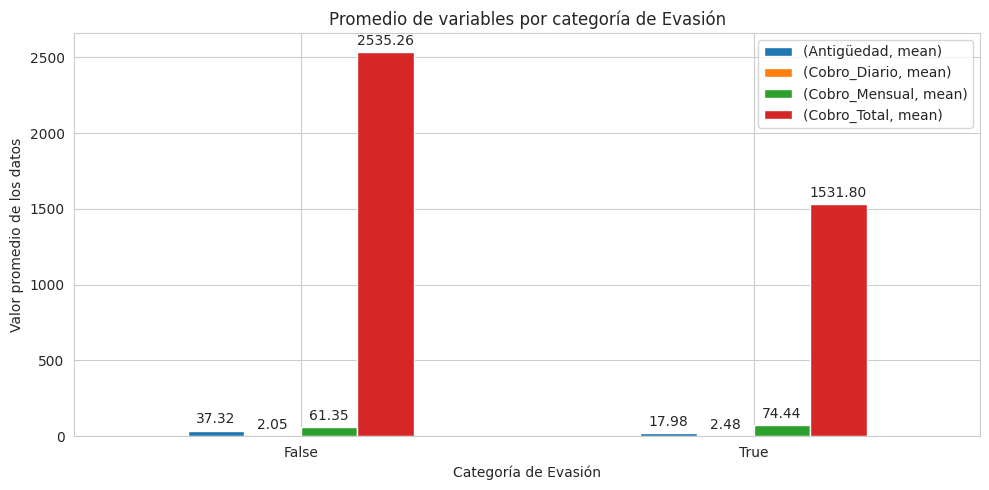

In [97]:
#Gráfico de la tabla con estducios descriptivos con base en las Evasiones que se tienen en la empresa


ax = tabla_descriptiva.loc[:, (slice(None), 'mean')].plot(kind='bar', figsize=(10,5))
plt.title("Promedio de variables por categoría de Evasión")
plt.ylabel("Valor promedio de los datos")
plt.xlabel("Categoría de Evasión")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()

# Agregar etiquetas numéricas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=10, padding=3)

plt.show()

#### Gráfico del Recuento por Antigüedad

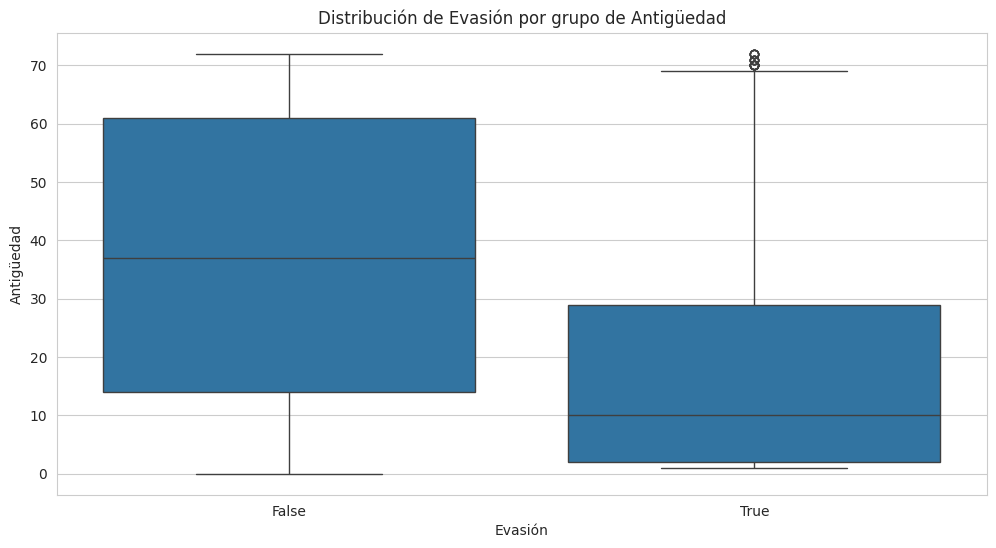

In [98]:
plt.figure(figsize=(12,6))
sns.boxplot(data=datos_telecomx_final, x='Evasión', y='Antigüedad')
plt.title("Distribución de Evasión por grupo de Antigüedad")
plt.xlabel("Evasión")
plt.ylabel("Antigüedad")
plt.show()

#### Gráfico del Recuento por Cobro Diario

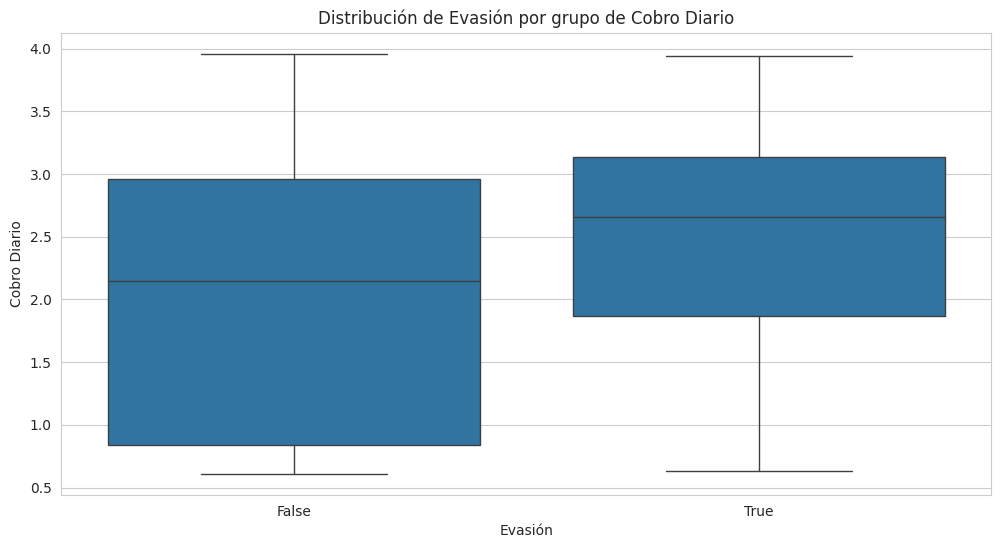

In [99]:
plt.figure(figsize=(12,6))
sns.boxplot(data=datos_telecomx_final, x='Evasión', y='Cobro_Diario')
plt.title("Distribución de Evasión por grupo de Cobro Diario")
plt.xlabel("Evasión")
plt.ylabel("Cobro Diario")
plt.show()

#### Gráfico del Recuento por Cobro Mensual

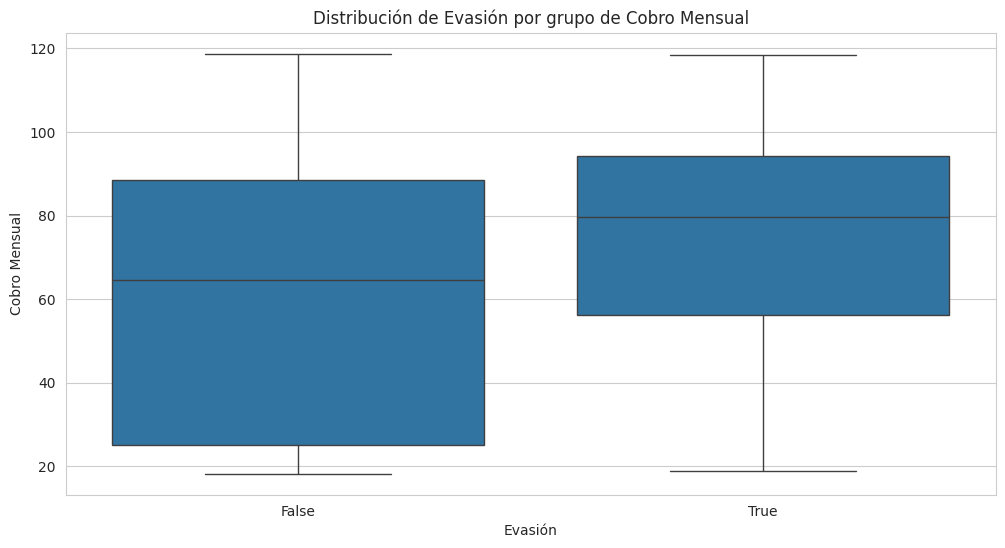

In [100]:
plt.figure(figsize=(12,6))
sns.boxplot(data=datos_telecomx_final, x='Evasión', y='Cobro_Mensual')
plt.title("Distribución de Evasión por grupo de Cobro Mensual")
plt.xlabel("Evasión")
plt.ylabel("Cobro Mensual")
plt.show()

#### Gráfico del Recuento por Cobro Total

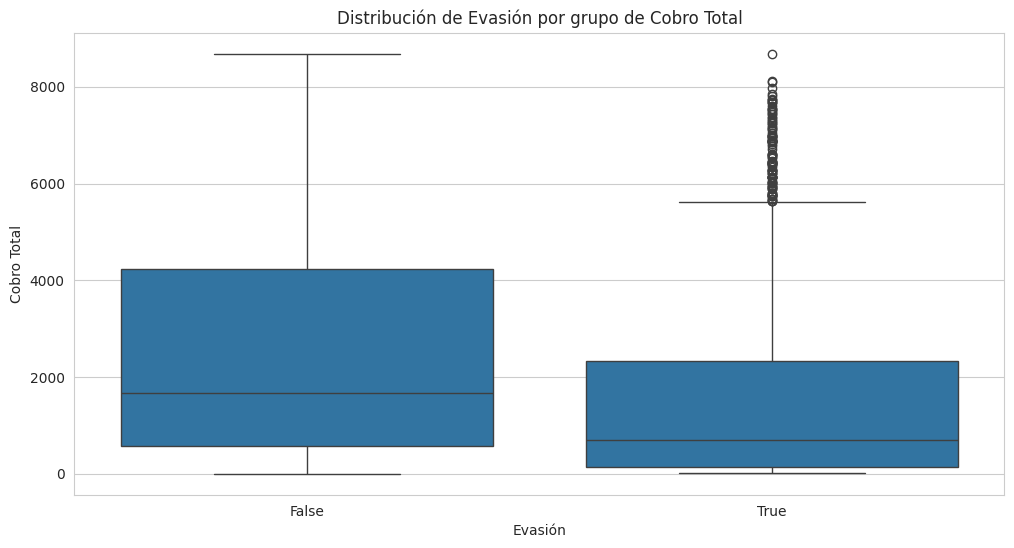

In [101]:
plt.figure(figsize=(12,6))
sns.boxplot(data=datos_telecomx_final, x='Evasión', y='Cobro_Total')
plt.title("Distribución de Evasión por grupo de Cobro Total")
plt.xlabel("Evasión")
plt.ylabel("Cobro Total")
plt.show()

### Recuento de evasión por variables booleanas

In [102]:
# Definir la lista de columnas booleanas
columnas_boolean = ['Adulto_Mayor', 'Tiene_Pareja', 'Dependientes', 'Servicio_Teléfono', 'Facturación_Digital']

for col in columnas_boolean:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(datos_telecomx_final[col], datos_telecomx_final['Evasión'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por Adulto_Mayor ---
Evasión       False  True 
Adulto_Mayor              
False         77.11  22.89
True          59.73  40.27

--- Porcentaje de evasión por Tiene_Pareja ---
Evasión       False  True 
Tiene_Pareja              
False         67.99  32.01
True          80.98  19.02

--- Porcentaje de evasión por Dependientes ---
Evasión       False  True 
Dependientes              
False         69.66  30.34
True          85.05  14.95

--- Porcentaje de evasión por Servicio_Teléfono ---
Evasión            False  True 
Servicio_Teléfono              
False              75.95  24.05
True               74.10  25.90

--- Porcentaje de evasión por Facturación_Digital ---
Evasión              False  True 
Facturación_Digital              
False                84.13  15.87
True                 67.52  32.48


#### Gráfico del Recuento por Evasión

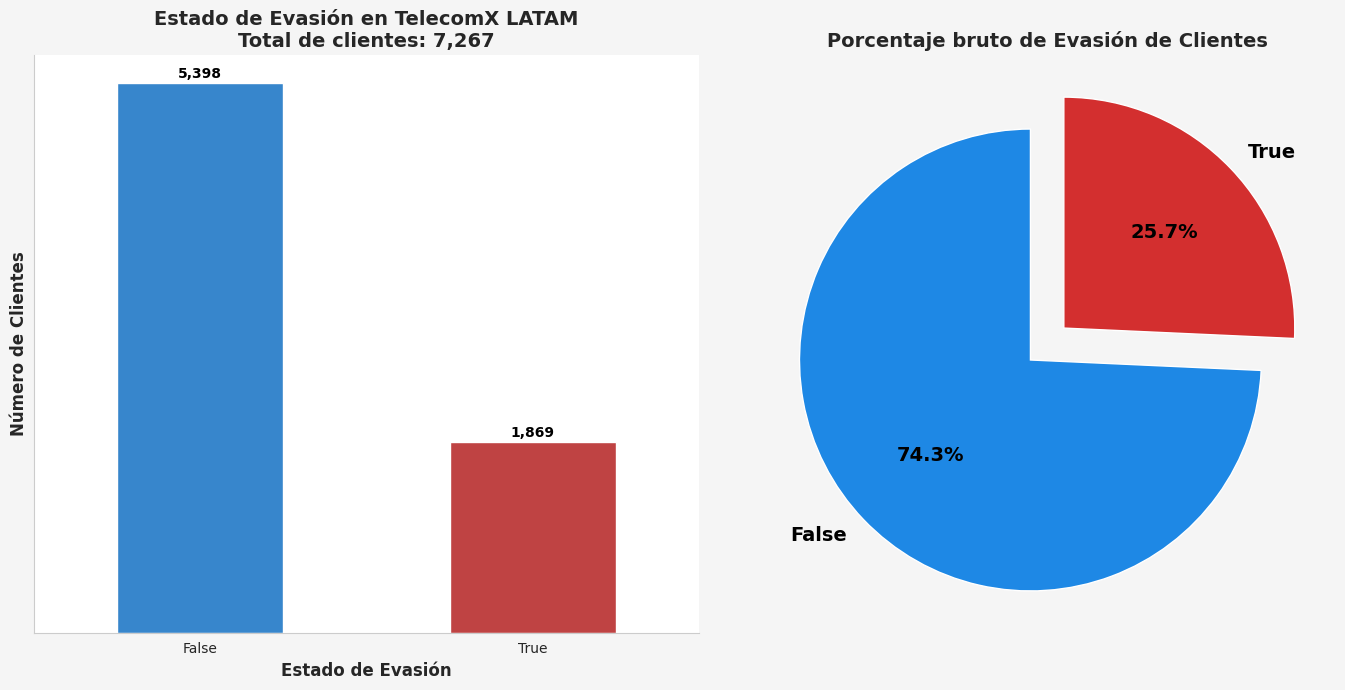

In [103]:
# Contar la cantidad de clientes por la categoría de "Evasión"
conteo_churn = datos_telecomx_final["Evasión"].value_counts()
total_clientes = datos_telecomx_final.shape[0]


# 🔹 **Crear subplots**
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,7))  # 2 filas, 2 columnas



#####################################################################################################################################################################################



### 📊 **Gráfico de barras**
sns.set_style("whitegrid")
sns.barplot(x=conteo_churn.index, y=conteo_churn.values, hue=conteo_churn.index, palette=["#1E88E5", "#D32F2F"], legend=False, width=0.5, ax=axs[0])


# Configuración del gráfico de barras (evasión)
axs[0].set_title(f"Estado de Evasión en TelecomX LATAM\nTotal de clientes: {total_clientes:,}", fontsize=14, fontweight="bold")
axs[0].set_xlabel("Estado de Evasión", fontsize=12, fontweight="bold")
axs[0].set_ylabel("Número de Clientes", fontsize=12, fontweight="bold")
axs[0].set_xticks(range(len(conteo_churn.index)))
axs[0].set_xticklabels(conteo_churn.index, fontsize=10)
axs[0].set_yticks([])


# Etiquetas en las barras
for i, j in enumerate(conteo_churn.values):
    axs[0].text(i, j + 50, f"{j:,}", color="black", fontsize=10, ha="center", fontweight="bold")

sns.despine(ax=axs[0])






###################################################################

### 🔵 **Gráfico circular (evasión)**
colores = ["#1E88E5", "#D32F2F", "#FFC107"]
axs[1].pie(conteo_churn.values, labels=conteo_churn.index, autopct="%1.1f%%",
             textprops={"fontsize": 14, "fontweight": "bold", "color": "black"},
             colors=colores[:len(conteo_churn.index)], startangle=90,
             explode=[0.1] * len(conteo_churn.index))

fig.patch.set_facecolor("#f5f5f5")
axs[1].set_facecolor("#f5f5f5")
axs[1].set_title("Porcentaje bruto de Evasión de Clientes", fontsize=14, fontweight="bold")



### 🔹 **Ajustar espacios**
plt.tight_layout()

# 🔹 **Mostrar gráficos**
plt.show()

#### Gráfico del Recuento por Evasión - Adulto Mayor

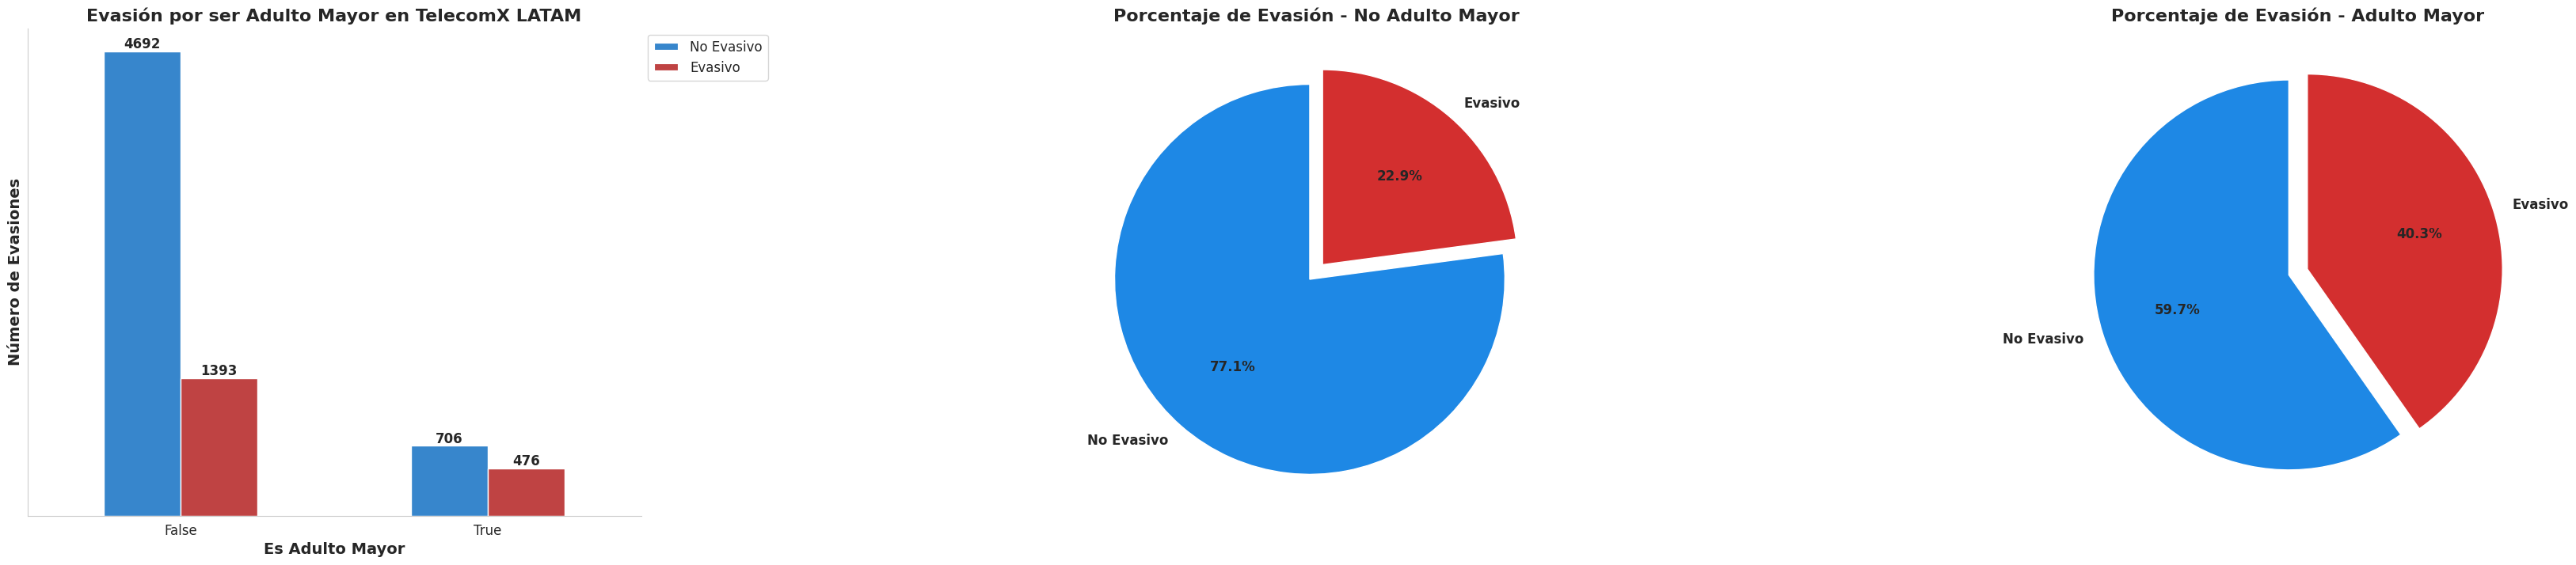

In [104]:
# Contar la cantidad de clientes por la categoría de "Adulto_Mayor"



# 🔹 **Crear subplots**
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(42, 8), gridspec_kw={'width_ratios': [3, 3, 3]}, ) # Increased figsize for 3 plots

# ... (rest of the code for the bar plot in axs[0] remains the same)

# 🔹 **Extraer valores de evasión por Adulto Mayor**
conteo_evasion_Adulto_Mayor = datos_telecomx_final.groupby(["Adulto_Mayor", "Evasión"], observed=True).size().unstack(fill_value=0)
False_values = conteo_evasion_Adulto_Mayor.loc[False, :].values
True_values = conteo_evasion_Adulto_Mayor.loc[True, :].values
labels = ["No Evasivo", "Evasivo"]

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Adulto_Mayor_melted = conteo_evasion_Adulto_Mayor.reset_index().melt(id_vars="Adulto_Mayor", var_name="Evasión", value_name="Count")

# 🔹 **Gráfico de barras (Evasión por Adulto_Mayor)**
sns.barplot(
    x='Adulto_Mayor',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Adulto_Mayor_melted,
    palette=["#1E88E5", "#D32F2F"],
    width=0.5,
    ax=axs[0] # Plot on the first subplot
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por ser Adulto Mayor en TelecomX LATAM", fontsize=16, fontweight="bold")
axs[0].set_xlabel("Es Adulto Mayor", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética

#####################################################################################################################################################################################

### 🔵 **Gráfico circular para No Adultos Mayores**
axs[1].pie( # Plot on the second subplot
    False_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}
)
axs[1].set_title("Porcentaje de Evasión - No Adulto Mayor", fontsize=16, fontweight="bold")
axs[1].set_facecolor("#f5f5f5")

#####################################################################################################################################################################################

### 🔵 **Gráfico circular para Adultos Mayores**
axs[2].pie( # Plot on the third subplot
    True_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}
)
axs[2].set_title("Porcentaje de Evasión - Adulto Mayor", fontsize=16, fontweight="bold")
axs[2].set_facecolor("#f5f5f5") # Added background color for consistency

#####################################################################################################################################################################################

# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=0.6) # Adjusted wspace for 3 plots

# 🔹 **Mostrar gráficos**
plt.show()

#### Gráfico del Recuento por Evasión - Tiene Pareja

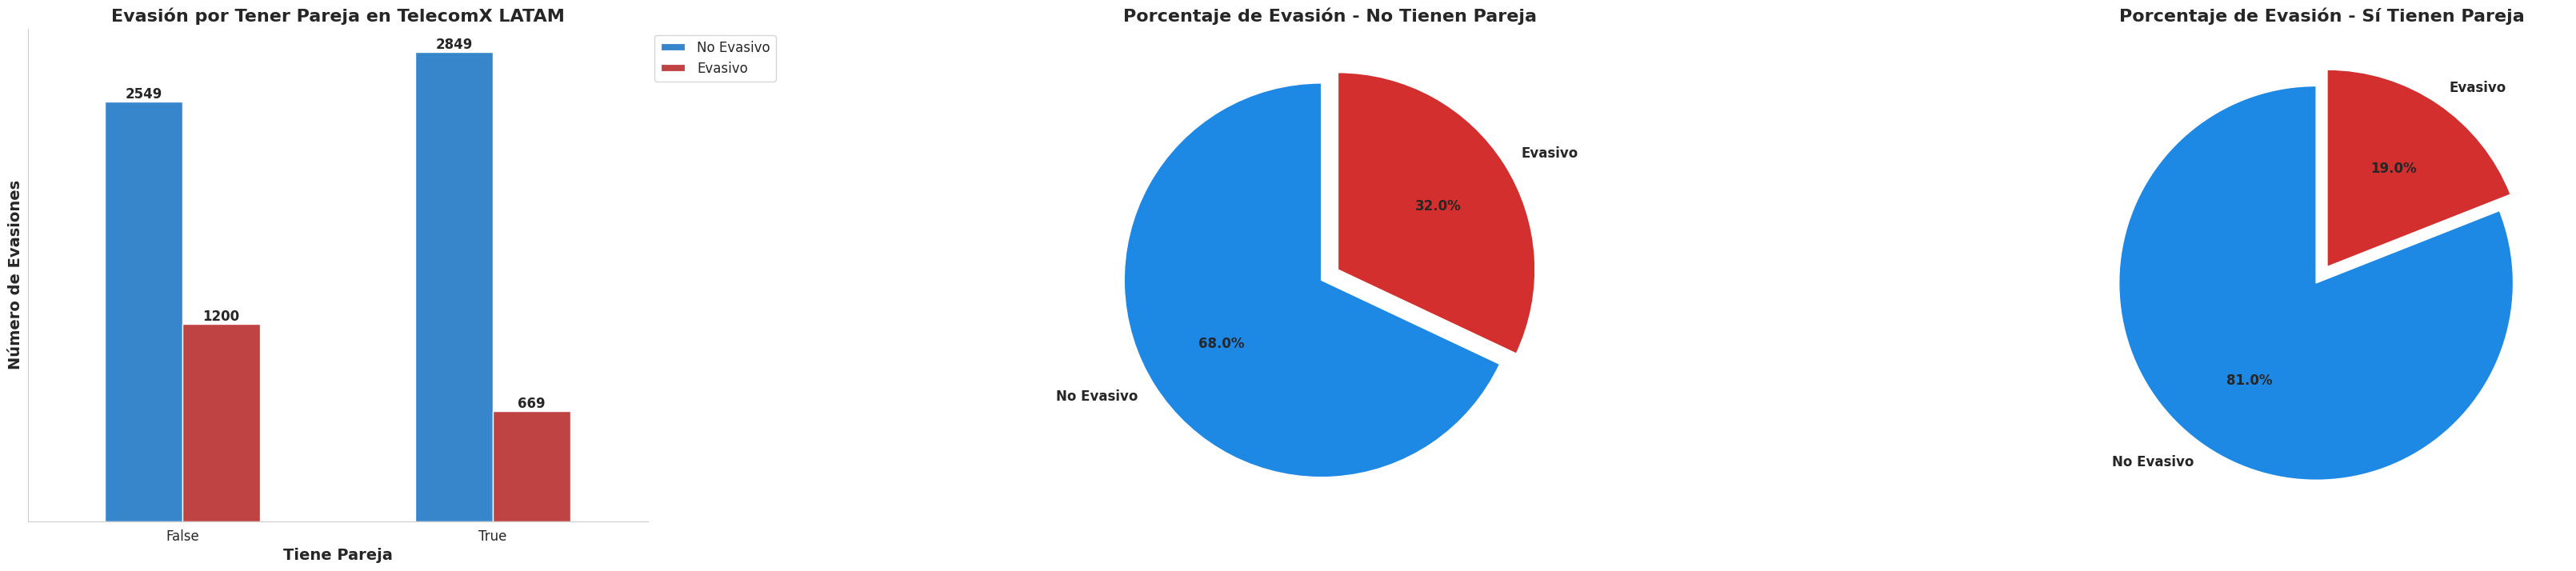

In [105]:
# Contar la cantidad de clientes por la categoría de "Tiene_Pareja "



# 🔹 **Crear subplots**
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(42, 8), gridspec_kw={'width_ratios': [3, 3, 3]}, ) # Increased figsize for 3 plots

# ... (rest of the code for the bar plot in axs[0] remains the same)

# 🔹 **Extraer valores de evasión por "Tienen Pareja"**
conteo_evasion_Tiene_Pareja  = datos_telecomx_final.groupby(["Tiene_Pareja", "Evasión"], observed=True).size().unstack(fill_value=0)
False_values = conteo_evasion_Tiene_Pareja.loc[False, :].values
True_values = conteo_evasion_Tiene_Pareja.loc[True, :].values
labels = ["No Evasivo", "Evasivo"]

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Tiene_Pareja_melted = conteo_evasion_Tiene_Pareja.reset_index().melt(id_vars="Tiene_Pareja", var_name="Evasión", value_name="Count")



##################################################################################################################################################################################################



# 🔹 **Gráfico de barras (Evasión por Tienen_Pareja)**
sns.barplot(
    x='Tiene_Pareja',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Tiene_Pareja_melted,
    palette=["#1E88E5", "#D32F2F"],
    width=0.5,
    ax=axs[0] # Plot on the first subplot
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Tener Pareja en TelecomX LATAM", fontsize=16, fontweight="bold")
axs[0].set_xlabel("Tiene Pareja", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética

#####################################################################################################################################################################################

### 🔵 **Gráfico circular para los que no tienen pareja**
axs[1].pie( # Plot on the second subplot
    False_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}
)
axs[1].set_title("Porcentaje de Evasión - No Tienen Pareja", fontsize=16, fontweight="bold")
axs[1].set_facecolor("#f5f5f5")

#####################################################################################################################################################################################

### 🔵 **Gráfico circular para los que tienen pareja**
axs[2].pie( # Plot on the third subplot
    True_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}
)
axs[2].set_title("Porcentaje de Evasión - Sí Tienen Pareja", fontsize=16, fontweight="bold")
axs[2].set_facecolor("#f5f5f5")

#####################################################################################################################################################################################

# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=0.6) # Adjusted wspace for 3 plots

# 🔹 **Mostrar gráficos**
plt.show()

#### Gráfico del Recuento por Evasión - Dependientes

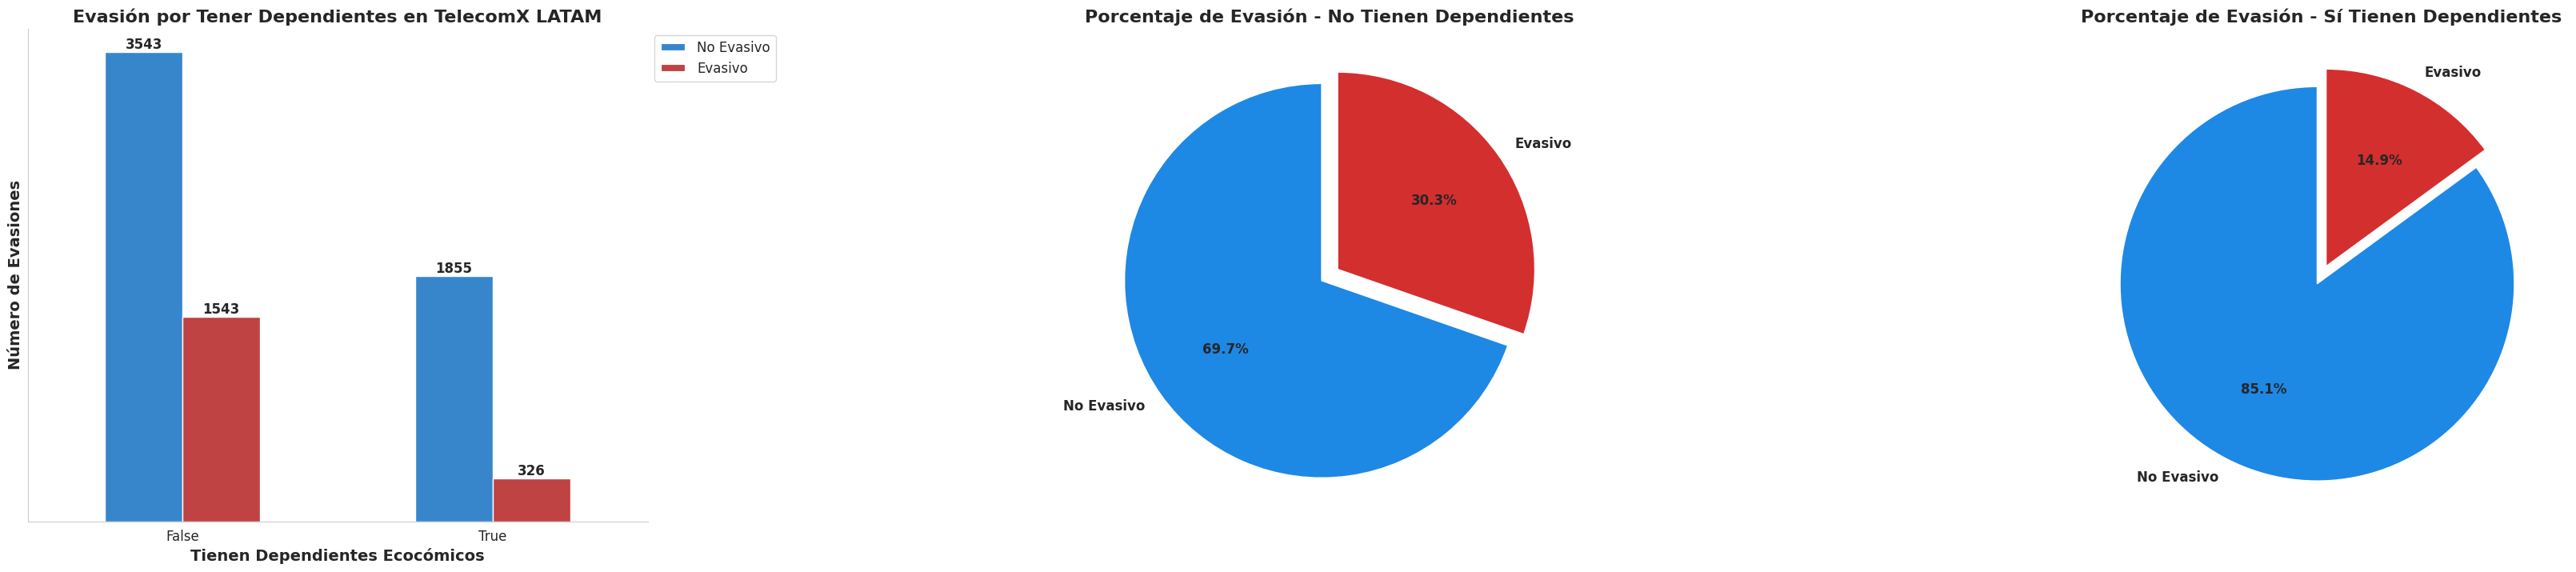

In [106]:
# Contar la cantidad de clientes por la categoría de "Dependientes"



# 🔹 **Crear subplots**
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(42, 8), gridspec_kw={'width_ratios': [3, 3, 3]}, ) # Increased figsize for 3 plots

# ... (rest of the code for the bar plot in axs[0] remains the same)

# 🔹 **Extraer valores de evasión por "Dependientes"**
conteo_evasion_Dependientes  = datos_telecomx_final.groupby(["Dependientes", "Evasión"], observed=True).size().unstack(fill_value=0)
False_values = conteo_evasion_Dependientes.loc[False, :].values
True_values = conteo_evasion_Dependientes.loc[True, :].values
labels = ["No Evasivo", "Evasivo"]

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Dependientes_melted = conteo_evasion_Dependientes.reset_index().melt(id_vars="Dependientes", var_name="Evasión", value_name="Count")



##################################################################################################################################################################################################



# 🔹 **Gráfico de barras (Evasión por Dependientes)**
sns.barplot(
    x='Dependientes',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Dependientes_melted,
    palette=["#1E88E5", "#D32F2F"],
    width=0.5,
    ax=axs[0] # Plot on the first subplot
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Tener Dependientes en TelecomX LATAM", fontsize=16, fontweight="bold")
axs[0].set_xlabel("Tienen Dependientes Ecocómicos", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética

#####################################################################################################################################################################################

### 🔵 **Gráfico circular para los que no tienen Dependientes**
axs[1].pie( # Plot on the second subplot
    False_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}
)
axs[1].set_title("Porcentaje de Evasión - No Tienen Dependientes", fontsize=16, fontweight="bold")
axs[1].set_facecolor("#f5f5f5")

#####################################################################################################################################################################################

### 🔵 **Gráfico circular para los que tienen Dependientes**
axs[2].pie( # Plot on the third subplot
    True_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}
)
axs[2].set_title("Porcentaje de Evasión - Sí Tienen Dependientes", fontsize=16, fontweight="bold")
axs[2].set_facecolor("#f5f5f5")

#####################################################################################################################################################################################

# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=0.6) # Adjusted wspace for 3 plots

# 🔹 **Mostrar gráficos**
plt.show()

#### Gráfico del Recuento por Evasión - Servicio Telefónico

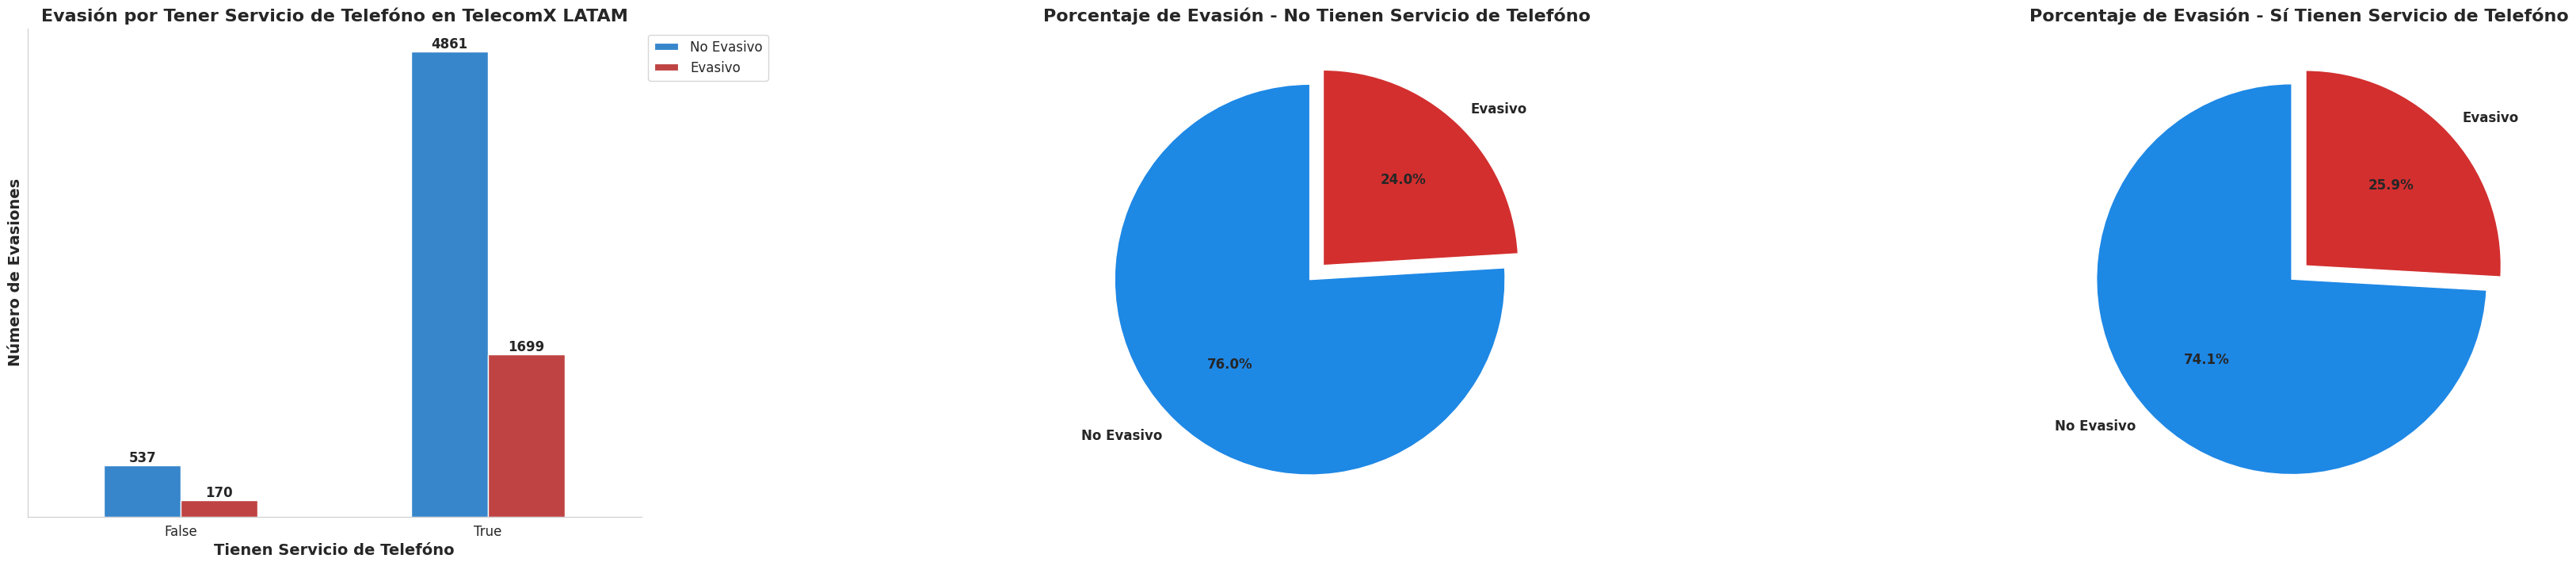

In [107]:
# Contar la cantidad de clientes por la categoría de "Servicio_Teléfono"



# 🔹 **Crear subplots**
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(42, 8), gridspec_kw={'width_ratios': [3, 3, 3]}, ) # Increased figsize for 3 plots

# ... (rest of the code for the bar plot in axs[0] remains the same)

# 🔹 **Extraer valores de evasión por "Servicio_Teléfono"**
conteo_evasion_Servicio_Teléfono  = datos_telecomx_final.groupby(["Servicio_Teléfono", "Evasión"], observed=True).size().unstack(fill_value=0)
False_values = conteo_evasion_Servicio_Teléfono.loc[False, :].values
True_values = conteo_evasion_Servicio_Teléfono.loc[True, :].values
labels = ["No Evasivo", "Evasivo"]

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Servicio_Teléfono_melted = conteo_evasion_Servicio_Teléfono.reset_index().melt(id_vars="Servicio_Teléfono", var_name="Evasión", value_name="Count")



##################################################################################################################################################################################################



# 🔹 **Gráfico de barras (Evasión por Servicio_Teléfono)**
sns.barplot(
    x='Servicio_Teléfono',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Servicio_Teléfono_melted,
    palette=["#1E88E5", "#D32F2F"],
    width=0.5,
    ax=axs[0] # Plot on the first subplot
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Tener Servicio de Telefóno en TelecomX LATAM", fontsize=16, fontweight="bold")
axs[0].set_xlabel("Tienen Servicio de Telefóno", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética

#####################################################################################################################################################################################

### 🔵 **Gráfico circular para los que no tienen Servicio de Telefóno**
axs[1].pie( # Plot on the second subplot
    False_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}
)
axs[1].set_title("Porcentaje de Evasión - No Tienen Servicio de Telefóno", fontsize=16, fontweight="bold")
axs[1].set_facecolor("#f5f5f5")

#####################################################################################################################################################################################

### 🔵 **Gráfico circular para los que tienen Servicio de Telefóno**
axs[2].pie( # Plot on the third subplot
    True_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}
)
axs[2].set_title("Porcentaje de Evasión - Sí Tienen Servicio de Telefóno", fontsize=16, fontweight="bold")
axs[2].set_facecolor("#f5f5f5")

#####################################################################################################################################################################################

# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=0.6) # Adjusted wspace for 3 plots

# 🔹 **Mostrar gráficos**
plt.show()

#### Gráfico del Recuento por Evasión - Facturación Digital

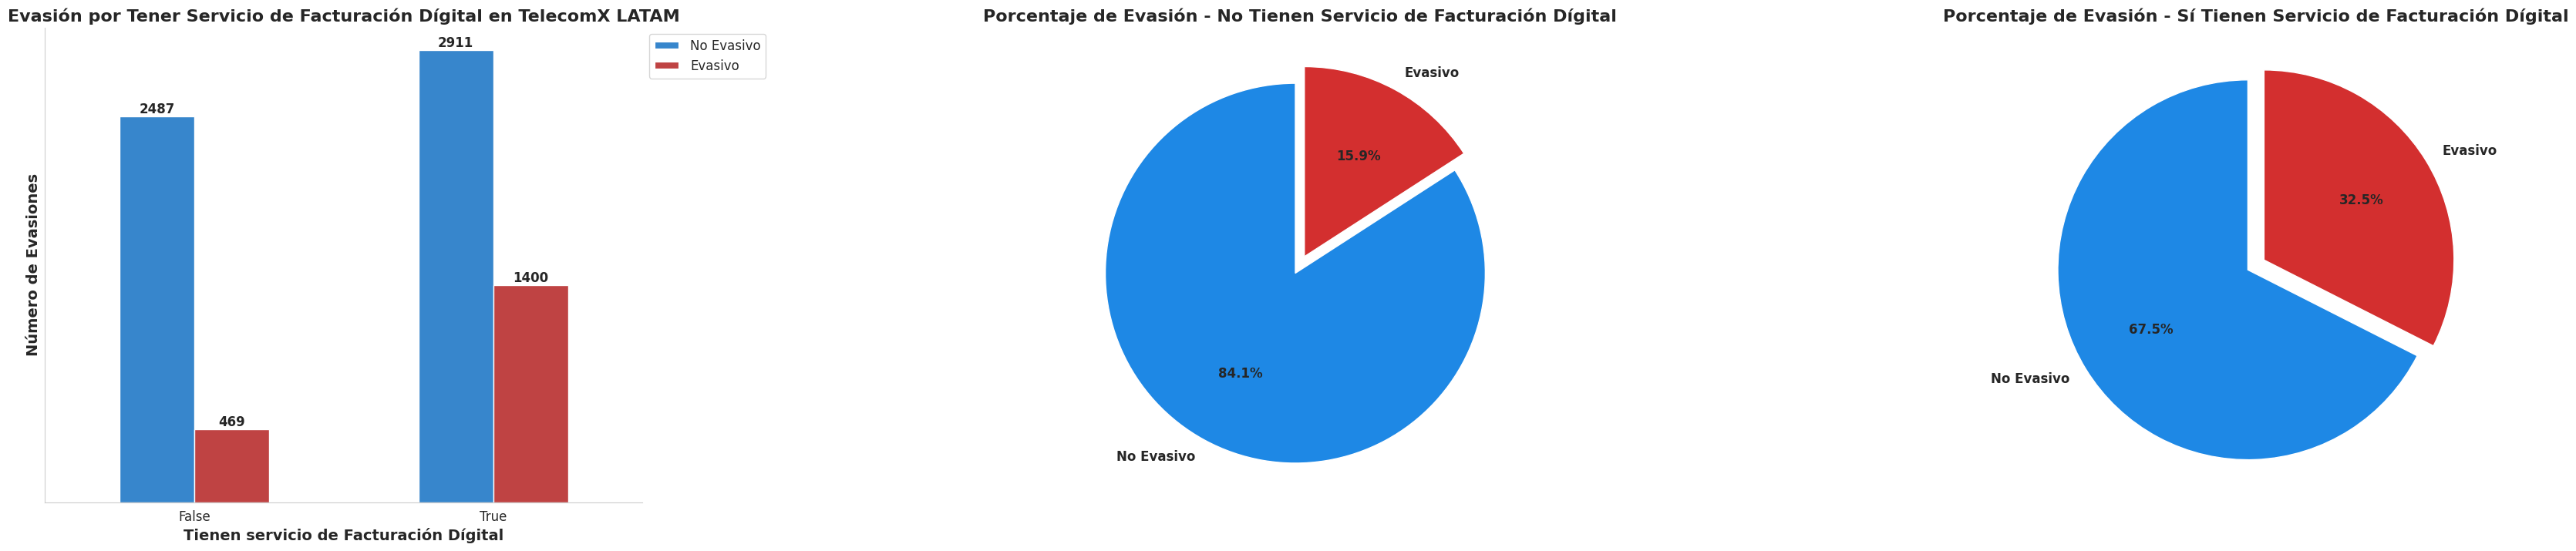

In [108]:
# Contar la cantidad de clientes por la categoría de "Facturación_Digital"



# 🔹 **Crear subplots**
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(42, 8), gridspec_kw={'width_ratios': [3, 3, 3]}, ) # Increased figsize for 3 plots

# ... (rest of the code for the bar plot in axs[0] remains the same)

# 🔹 **Extraer valores de evasión por "Servicio_Teléfono"**
conteo_evasion_Facturación_Digital  = datos_telecomx_final.groupby(["Facturación_Digital", "Evasión"], observed=True).size().unstack(fill_value=0)
False_values = conteo_evasion_Facturación_Digital.loc[False, :].values
True_values = conteo_evasion_Facturación_Digital.loc[True, :].values
labels = ["No Evasivo", "Evasivo"]

# 🔹 **Transformar los datos para que sean compatibles con el gráfico de barras**
conteo_evasion_Facturación_Digital_melted = conteo_evasion_Facturación_Digital.reset_index().melt(id_vars="Facturación_Digital", var_name="Evasión", value_name="Count")



##################################################################################################################################################################################################



# 🔹 **Gráfico de barras (Evasión por Facturación_Digital)**
sns.barplot(
    x='Facturación_Digital',
    y='Count',
    hue='Evasión',
    data=conteo_evasion_Facturación_Digital_melted,
    palette=["#1E88E5", "#D32F2F"],
    width=0.5,
    ax=axs[0] # Plot on the first subplot
)

# 🔹 **Configurar etiquetas y tamaño del texto**
axs[0].set_title("Evasión por Tener Servicio de Facturación Dígital en TelecomX LATAM", fontsize=16, fontweight="bold")
axs[0].set_xlabel("Tienen servicio de Facturación Dígital", fontsize=14, fontweight="bold")
axs[0].set_ylabel("Número de Evasiones", fontsize=14, fontweight="bold")
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_yticks([])

# 🔹 **Configurar la leyenda con tamaño adecuado**
axs[0].legend(
    title="Evasión",
    labels=["No Evasivo", "Evasivo"],
    bbox_to_anchor=(1, 1),  # Mover la leyenda fuera del gráfico
    loc="upper left",
    fontsize=12,
    markerscale=2  # 🔹 Aumentar el tamaño de los íconos en la leyenda
)

# 🔹 **Asegurar que los colores en la leyenda coincidan con los de la gráfica**
handles, labels_legend = axs[0].get_legend_handles_labels()
axs[0].legend(handles=handles, labels=["No Evasivo", "Evasivo"], bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)



#####################################################################################################################################################################################



# 🔹 **Aumentar el grosor de las líneas en la leyenda para mejor visibilidad**
if axs[0].get_legend():  # Verificar si la leyenda existe antes de modificarla
    for leg in axs[0].get_legend().legend_handles:
        leg.set_linewidth(3)  # Aumenta el grosor de los íconos en la leyenda

# 🔹 **Etiquetas más grandes sobre las barras**
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%d', label_type='edge', fontsize=12, fontweight='bold')

sns.despine(ax=axs[0])  # 🔹 Remover bordes del gráfico para mejor estética

#####################################################################################################################################################################################

### 🔵 **Gráfico circular para los que no tienen Servicio de Facturación Dígital**
axs[1].pie( # Plot on the second subplot
    False_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}
)
axs[1].set_title("Porcentaje de Evasión - No Tienen Servicio de Facturación Dígital", fontsize=16, fontweight="bold")
axs[1].set_facecolor("#f5f5f5")

#####################################################################################################################################################################################

### 🔵 **Gráfico circular para los que tienen Servicio de Facturación Dígital**
axs[2].pie( # Plot on the third subplot
    True_values,
    labels=labels,
    autopct="%1.1f%%",
    colors=["#1E88E5", "#D32F2F"],
    startangle=90,
    explode=[0.05, 0.05],
    textprops={"fontsize": 12, "fontweight": "bold"}
)
axs[2].set_title("Porcentaje de Evasión - Sí Tienen Servicio de Facturación Dígital", fontsize=16, fontweight="bold")
axs[2].set_facecolor("#f5f5f5")

#####################################################################################################################################################################################

# 🔹 **Separar mejor los gráficos**
plt.subplots_adjust(wspace=0.6) # Adjusted wspace for 3 plots

# 🔹 **Mostrar gráficos**
plt.show()

### Análisis de correlación entre variables

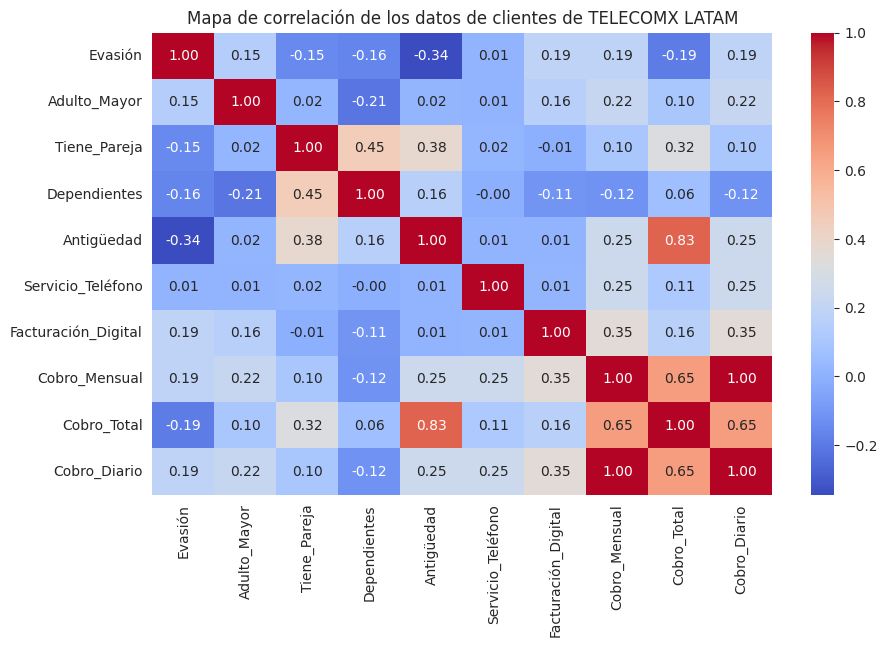

In [109]:
# Eliminamos columnas no numéricas para evitar correlaciones obvias o errores
columnas_a_excluir = ['ID_Cliente']
df_filtrado = datos_telecomx_final.drop(columnas_a_excluir, axis=1)

# Calculamos la nueva correlación
# Especificamos numeric_only=True para asegurar que solo se consideren columnas numéricas
correlacion_filtrada = df_filtrado.corr(numeric_only=True)

# Generamos el heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlacion_filtrada, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlación de los datos de clientes de TELECOMX LATAM")
plt.show()

## 📄Informe final

### Introducción

En el marco del proyecto "Churn de Clientes" de Telecom X LATAM, se ha llevado a cabo un análisis exhaustivo de datos con el propósito de comprender los factores que contribuyen a la alta tasa de cancelaciones de clientes. Para ello, se han utilizado herramientas avanzadas de procesamiento y análisis de datos en Python, empleando sus principales bibliotecas para extraer información relevante.

Este estudio ha permitido sentar las bases para el desarrollo de modelos predictivos que faciliten la identificación de patrones de pérdida de clientes. A partir de estos hallazgos, el equipo de Data Science podrá diseñar estrategias efectivas orientadas a reducir la evasión, optimizando así la retención y fidelización de los clientes.

### Limpieza y tratamiento de datos

El análisis de evasión de clientes en Telecom X LATAM requirió un proceso estructurado de preparación de datos, que abarcó las etapas de extracción, transformación y carga.

* 📌 Extracción: Se convirtió el formato original a uno en el que se lograra leer con claridad los datos relevantes y se organizaron para su posterior análisis.

* 🔧 Transformación: Se llevó a cabo una serie de procedimientos que incluyeron la identificación de inconsistencias, el tratamiento de valores faltantes y la estandarización de los datos, asegurando que la información estuviera lista para el análisis. Estos pasos están detallados en la sección Transformación.

* 📊 Carga y análisis: Una vez procesados, los datos fueron integrados y utilizados para el análisis descriptivo, donde se exploró la distribución de evasión y su relación con diversas variables categóricas, numéricas y booleanas. Los resultados de este análisis pueden encontrarse en la sección Carga y análisis.

### Análisis exploratorio de datos

#### Introducción a los análisis

Como parte del proyecto Churn de Clientes de Telecom X LATAM, se ha llevado a cabo un análisis exhaustivo con el objetivo de identificar los factores que influyen en la cancelación de clientes. A través de diversas visualizaciones y estadísticas descriptivas, se han examinado patrones en múltiples variables, lo que permite comprender mejor el comportamiento de los usuarios y las posibles razones detrás del alto índice de evasión.

Los siguientes análisis presentan distribuciones, correlaciones y tendencias clave, proporcionando una base sólida para el desarrollo de estrategias enfocadas en la retención y fidelización de clientes.

### 📌 **Conclusiones Finales**  

#### **Principales Hallazgos**  
1. **Contrato "mes a mes"**:  
   - La tasa de evasión más alta (**41.32%**) se observa en clientes con este tipo de contrato, frente a solo **2.75%** en contratos de 2 años.  
   - *Recomendación*: Promover migración a contratos anuales/bienales con incentivos (ej: descuentos progresivos).  

2. **Fibra óptica y cobros elevados**:  
   - **40.56%** de evasión en fibra óptica (vs. 18.45% en DSL), asociado a un mayor cobro mensual (**$74.44** vs. $61.35).  
   - *Recomendación*: Revisar calidad-precio del servicio y ofrecer paquetes con valor añadido (ej: soporte técnico incluido).  

3. **Facturación digital**:  
   - **32.48%** de evasión en clientes con factura digital (vs. 15.87% en física).  
   - *Recomendación*: Optimizar diseño de facturas y agregar recordatorios multicanal (SMS/email).  

4. **Perfil de alto riesgo**:  
   - **Adultos mayores** (40.27% evasión), **clientes nuevos** (<1 año de antigüedad) y **sin servicios añadidos** (seguridad, respaldo).  
   - *Recomendación*: Programas de retención temprana y soporte dedicado para adultos mayores.  

---

### 📊 **Resumen Correlacional**  
| **Factor**               | **Relación con Evasión**       | **Impacto**                  |  
|---------------------------|--------------------------------|------------------------------|  
| Antigüedad                | Correlación negativa (-0.34)   | A menor antigüedad, mayor riesgo. |  
| Facturación digital       | Correlación positiva (+0.19)   | Aumenta probabilidad de cancelación. |  
| Cobro mensual             | Correlación positiva (+0.19)   | Cobros altos vinculados a evasión. |  

---

### 🚀 **Acciones Estratégicas**  
1. **Fidelización**: Bonificaciones por antigüedad (ej: 10% de descuento al cumplir 1 año).  
2. **Optimización de servicios**: Paquetes "Todo incluido" para fibra óptica.  
3. **Comunicación clara**: Rediseño de facturas digitales + recordatorios automáticos.  
4. **Enfoque en perfiles críticos**: Ofertas personalizadas para adultos mayores y clientes nuevos.  